<a href="https://colab.research.google.com/github/jpedro-rod/ElementosFinitos/blob/main/M%C3%A9todos_Num%C3%A9ricos_modularizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import textwrap

Lembrando que:

$A\frac{{d^2f(x)}}{{dx^2}} + B\frac{{df(x)}}{{dx}} + Cf(x) + r_o(x) = 0$

$\frac{{d^2f(x)}}{{dx^2}} + 2\xi \omega_n \frac{{df(x)}}{{dx}} + \omega_n^2 f(x) + r(x) = 0$ onde $\xi = \frac{{B}}{{2A\omega_n}}$, $\omega_n^2 = \frac{{C}}{{A}}$

Se $\xi = 0$: Vibrações harmônicas

Se $0 < \xi < 1$: Vibrações subamortecidas

Se $\xi = 1$: Movimento criticamente amortecido

Se $\xi > 1$: Movimento super-amortecido

## Diferenças finitas

Este código é estruturado da seguinte forma: na primeira parte são construidas as funções que constituirão a função de diferenças finitas global e somente na segunda parte, na seção de exemplos, é onde se insere os parâmetros de sua EDO, domínio, espaçamento e ocorre a visualização dos gráficos.

In [5]:
#Domínio e spaçamento (função que gera DomX e h)
def Dom_h(a, b, pontos):
  DomX = np.linspace(a,b, pontos)
  h = abs(DomX[1]-DomX[0])
  return DomX, h

### EDOs

$A\frac{{d^2\theta(t)}}{{dt^2}} + B\frac{{d\theta(t)}}{{dt}} + Csin(\theta(t)) + r(t) = 0$

$\theta(a) = \theta_0$

$\frac{{d\theta(a)}}{{dt}} = Vo$


---


Para equações diferenciais não lineares desse tipo, não é possível obter a solução por sistema linear. Para resolvê-la, podemos diminuir a ordem da derivada definindo novas funções e usar um método recursivo. Veja abaixo:

$\frac{{\theta_{{j+1}} - \theta_{{j}}}}{{h}} = v_j  \Leftrightarrow \theta_{{j+1}} = hv_j + \theta_{{j}}$

Onde $v_j$ e $\theta_j$ são condições iniciais. Após essa recorrência, ainda podemos obter a velocidade do corpo ao longo do tempo:

$A\frac{{dv(t)}}{{dt}} + Bv(t) + Csin(\theta(t)) + r(t) = 0$

$Av_{{j+1}} = Av_{{j}} - Bh.v_{{j}} - Ch.sin(\theta_{{j+1}})$


In [ ]:
def dif_recursiva_IC(A, B, C, r, a, b, pontos, theta0, v0):

  DomX, h = Dom_h(a, b, pontos)
  Sol_theta = np.empty(DomX.shape)
  Sol_v = np.empty(DomX.shape)
  
  theta = theta0 + h*v0
  v = (A(DomX[0])*v0 - B(DomX[0])*h*v0 - C(DomX[0])*h*np.sin(theta) - r(DomX[0]))/A(DomX[0])

#Adicionando os valores de contorno aos vetores-solução

  Sol_theta[0] = theta0
  Sol_v[0] = v0
  Sol_theta[1] = theta
  Sol_v[1] = v

  for indice in range(2,len(DomX)):
    theta = theta + h*v
    Sol_theta[indice] = theta

    v = (A(DomX[indice])*v - B(DomX[indice])*h*v - C(DomX[indice])*h*np.sin(theta) - r(DomX[indice]))/A(DomX[indice])
    Sol_v[indice] = v

  return DomX, Sol_theta, Sol_v


#### Exemplos

Digite agora os parâmetros de seu problema na função de diferenças finitas para EDOs:


*   A 
*   B
*   C 
*   função conhecida r(x) 
*   ínicio do intervalo a 
*   fim intervalo b
*   nº de pontos
*   1º contorno
*   2º contorno

Solução não linear do movimento de um pêndulo amortecido criticamente via diferenças finitas da Apostila:

$\frac{{d^2\theta(t)}}{{dt^2}} + 2\xi \omega_n \frac{{d\theta(t)}}{{dt}} + \omega_n^2 \theta(t) + r(t) = 0$ onde $\xi = \frac{{B}}{{2A\omega_n}}$, $\omega_n^2 = \frac{{C}}{{A}}$

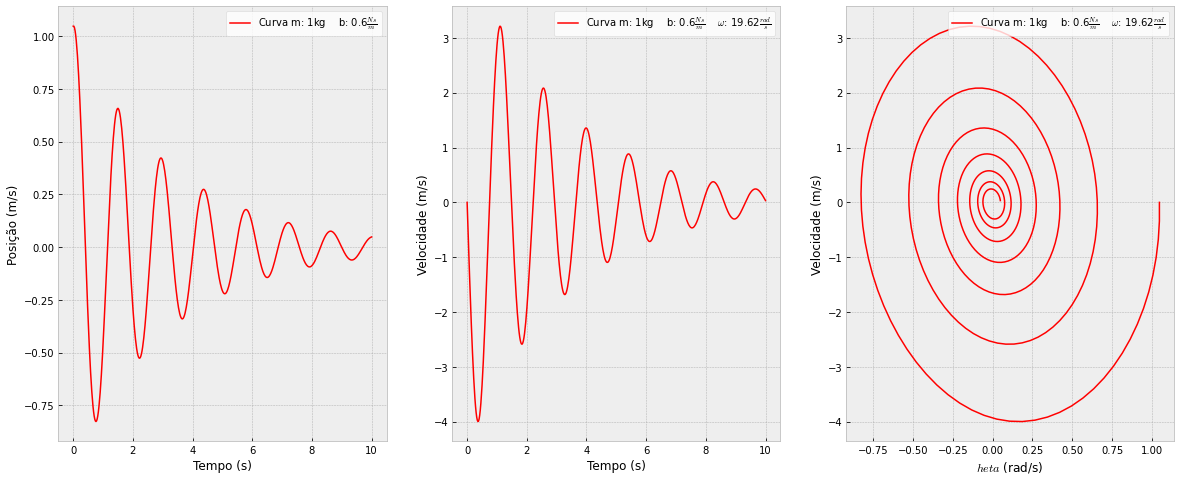

In [ ]:
#Parâmetros:
def A(x):
  return 1

def B(x):
  return 0.6

def C(x):
  return 9.81/0.5

def r(x):
  return 0

a = 0
b = 10
pontos = 500
theta0 =np.pi/3
v0 = 0

DomX, Sol_theta, Sol_v = dif_recursiva_IC(A, B, C, r, a, b, pontos, theta0, v0)

plt.style.use('bmh')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, sharex = False, figsize = (20,8))
    
ax1.plot(DomX, Sol_theta, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$'.format(1,B(0)))
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Posição (m/s)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.

ax2.plot(DomX, Sol_v, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$    $\omega$: {}$\frac{{rad}}{{s}}$'.format(1,B(0),C(0)))
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Velocidade (m/s)')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(Sol_theta, Sol_v, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$    $\omega$: {}$\frac{{rad}}{{s}}$'.format(1,B(0),C(0)))
ax3.set_xlabel('$\theta$ (rad/s)')
ax3.set_ylabel('Velocidade (m/s)')
ax3.legend(loc='best',facecolor ='w')

Solução não linear para caso sem amortecimento (movimento harmônico simples) via diferenças finitas da Apostila:

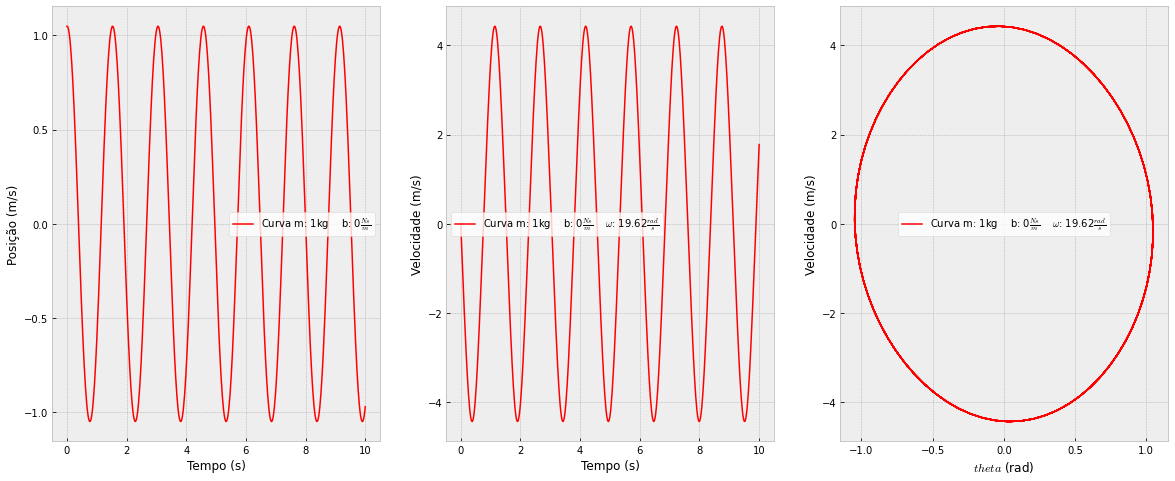

In [ ]:

#Parâmetros:
def A(x):
  return 1

def B(x):
  return 0

def C(x):
  return 9.81/0.5

def r(x):
  return 0

a = 0
b = 10
pontos = 500
theta0 =np.pi/3
v0 = 0

DomX, Sol_theta, Sol_v = dif_recursiva_IC(A, B, C, r, a, b, pontos, theta0, v0)

plt.style.use('bmh')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, sharex = False, figsize = (20,8))
    
ax1.plot(DomX, Sol_theta, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$'.format(A(0),B(0)))
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Posição (m/s)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.

ax2.plot(DomX, Sol_v, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$    $\omega$: {}$\frac{{rad}}{{s}}$'.format(A(0),B(0),C(0)))
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Velocidade (m/s)')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(Sol_theta, Sol_v, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$    $\omega$: {}$\frac{{rad}}{{s}}$'.format(A(0),B(0),C(0)))
ax3.set_xlabel('$theta$ (rad)')
ax3.set_ylabel('Velocidade (m/s)')
ax3.legend(loc='best',facecolor ='w')

Movimento de uma gota em queda sob arrasto e obtenção de sua velocidade terminal via diferenças finitas da Apostila:

$m\frac{{dv(t)}}{{dt}} + bv(t) - mg = 0$

$v(0) = v_0 \;\; (1ª C.C.)$

$bv(t) \leq mg$

$ v(t) \leq \frac{{mg}}{{b}} \;\; ⇔ \;\; v_{lim} = \frac{{mg}}{{b}} \;\; (2ª C.C.)$

Como temos o valor de $mg$, saberemos a velocidade em que as forças entrarão em equilíbrio e o corpo não estará mais acelerado.

Veja ainda que a equação deste problema é da forma:

$B\frac{{dv(x)}}{{dt}} + Cv(t) - r(t) = 0$

---


Para equações diferenciais não lineares desse tipo, não é possível obter a solução por sistema linear. Para resolvê-la, podemos diminuir a ordem da derivada definindo novas funções e usar um método recursivo. Veja abaixo:

$\frac{{dv_j}}{{dt}} = \frac{{v_{{j+1}} - v_{{j}}}}{{h}}$

Onde $v_j$ e $\theta_j$ são condições iniciais. Após essa recorrência, ainda podemos obter a velocidade do corpo ao longo do tempo:

$Bv_{{j+1}} = Bv_{{j}} - Ch.v_{{j}} + h.mg$


In [ ]:
def dif_recursiva_gota_IC(A, B, C, r, a, b, pontos, v0, vlim):

  DomX, h = Dom_h(a, b, pontos)
  Sol_v = np.empty(DomX.shape)

  v = (B(DomX[0])*v0 - C(DomX[0])*h*v0 + h*r(DomX[0]))/B(DomX[0])

#Adicionando os valores de contorno aos vetores-solução

  Sol_v[0] = v0
  Sol_v[1] = v

  contador = 1

  for indice in range(2,len(DomX)):
    if v <= vlim:   #A 1ª C.C. já foi usada, agora usamos a 2ª

      v =  (B(DomX[indice])*v - C(DomX[indice])*h*v + h*r(DomX[indice]))/B(DomX[indice])
      Sol_v[indice] = v

      contador = contador + 1

    else: 
      break

  '''
  COM WHILE DEU ERRADO, NÃO SEI A RAZÃO
  contador = 1
  indice = 2

  while v < 6.0675*10**(-5):

    v =  (B(DomX[indice])*v - C(DomX[indice])*h*v + h*r(DomX[indice]))/B(DomX[indice])
    
    Sol_v[indice] = v

    indice = indice + 1
    contador = contador + 1
  '''

  DomX = DomX[:contador]
  Sol_v = Sol_v[:contador]

  return DomX, Sol_v

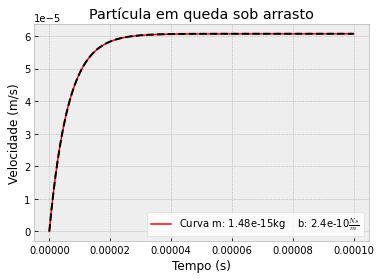

In [ ]:
#Parâmetros:
def A(x):
  return 0

def B(x):
  return 840*(np.pi*(1.5*10**(-6))**3)/6

def C(x):
  return 0.00016*(1.5*10**(-6))

def r(x):
  return 840*((np.pi*(1.5*10**(-6))**3)/6)*9.81

a = 0
b = 0.0001  #Para a curva aparecer completa o domínio precisar ser maior que 0.0001 (note que vlim ~ 0.00006)
pontos = 10**6
v0 = 0
vlim = 6.0675*10**(-5)

#OBS.: Neste caso não sabemos o instante final (b), saberemos somente pela velocidade final, q ainda será descoberta pela recorrência. Por isso o b colocado é apenas um nº arbitrário

DomX, Sol_v = dif_recursiva_gota_IC(A, B, C, r, a, b, pontos, v0, vlim)

def f_sol(x):
  return 0*np.exp(-C(0)*x/B(0)) + 0.0000607*(1 - np.exp(-C(0)*x/B(0)))

plt.style.use('bmh')

plt.style.use('bmh')

fig, (ax1) = plt.subplots()
    
ax1.plot(DomX, Sol_v, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$'.format(np.around(B(0),17),np.around(C(0),17)))
ax1.plot(DomX, f_sol(DomX), 'k--')
ax1.set_title('Partícula em queda sob arrasto')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade (m/s)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.

Lançamento de projétil sem e com arrasto (linear e quadrático): **???**

$m\frac{{d\overrightarrow{v}(t)}}{{dt}} = \overrightarrow{F}_{drag} - \overrightarrow{F}_{g}$

$m\frac{{dv_x(t)}}{{dt}} = -bv_x^2(t)$

$m\frac{{dv_y(t)}}{{dt}} = -bv_y^2(t) - mg$

$(v_x^2, v_y^2) = (|\overrightarrow{v}|^2.cos(\theta), |\overrightarrow{v}|^2.sin(\theta))$

Como condição de contorno, tem-se a velocidade inicial $\overrightarrow{v}_0$, a posição inicial $\overrightarrow{s}_0$ e o choque perfeitamente elástico do projétil com o chão (situado em $y = 0$), que pode ser expresso matematicamente, como $v_y = |v_y|$. Usando diferenças finitas superiores para discretizar as equações, obtem-se o seguinte:

$cos(\theta_{j+1}) = -\frac{{h.b}}{{m}}|v|cos(\theta_j) + cos(\theta_j)$

$sin(\theta_{j+1}) = -\frac{{h.b}}{{m}}|v|sin(\theta_j) + sin(\theta_j) - \frac{{h.g}}{{|v|}}$

Para obter a posição ao longo do tempo e fazer um gráfico $y$ x $x$, ainda é necessária a seguinte discretização:

$x_{j+1} = h*v_{xj} + x_j$

$y_{j+1} = h*v_{yj} + y_j$

Por fim, será assumido que a velocidade inicial seja dada vetorialmente, o que faz necessário calcular seu unitário para saber o ângulo inicial de saída.

In [ ]:
'''
def dif_projetil_IC(A, B, C, r, a, b, pontos, s0, v0):

  DomX, h = Dom_h(a, b, pontos)
  Sol_x = np.empty(DomX.shape)
  Sol_y = np.empty(DomX.shape)
  Sol_vx = np.empty(DomX.shape)
  Sol_vy = np.empty(DomX.shape)

  #Vetor posição inicial
  s0 = np.array(s0)
  #Vetor velocidade inicial
  v0 = np.array(v0)

  v0n = np.linalg.norm(v0)
  print(v0n)
  v0u = v0/np.linalg.norm(v0)
  theta0 = np.arccos(v0u[0])
  print(theta0)

  x = h*v0[0] + s0[0]
  y = h*v0[1] + s0[1]

  vx = -C(DomX[0])*h*v0[0]**2/B(DomX[0]) + v0[0]
  vy = (-C(DomX[0])*h*v0[1]**2 + B(DomX[0])*v0[1] - h*r(DomX[0]))/B(DomX[0])
  #theta = np.arcsin((-C(DomX[0])*h*v0n*np.sin(theta0) + B(DomX[0])*np.sin(theta0) - h*r(DomX[0])/v0n)/B(DomX[0]))
  #sin = (-C(DomX[0])*h*v0n*np.sin(theta0) + B(DomX[0])*np.sin(theta0) - h*r(DomX[0])/v0n)/B(DomX[0])

#Adicionando os valores de contorno aos vetores-solução

  Sol_x[0] = s0[0]
  Sol_y[0] = s0[1]
  Sol_x[1] = x
  Sol_y[1] = y
  Sol_vx[0] = v0[0]
  Sol_vy[0] = v0[1]
  Sol_vx[1] = vx
  Sol_vy[1] = vy
  
  for indice in range(2,len(DomX)):
    x = h*vx + x
    y = h*vy + y

    vx = -C(DomX[indice])*h*vx**2/B(DomX[indice]) + vx
    vy = (-C(DomX[indice])*h*vy**2 + B(DomX[indice])*vy - h*r(DomX[indice]))/B(DomX[indice])
    #theta = np.arcsin((-C(DomX[indice])*h*v0n*np.sin(theta) + B(DomX[indice])*np.sin(theta) - h*r(DomX[indice])/v0n)/B(DomX[indice]))
    #theta = np.arccos((-C(DomX[indice])*h*v0n*np.cos(theta) + B(DomX[indice])*np.cos(theta))/B(DomX[indice]))
    #sin = (-C(DomX[indice])*h*v0n*abs(sin) + B(DomX[indice])*abs(sin) - h*r(DomX[indice])/v0n)/B(DomX[indice])
    #print(theta)

    if y <= 0:
      Sol_x[indice] = x
      Sol_y[indice] = -y
      Sol_vx[indice] = vx
      Sol_vy[indice] = -vy
    elif y > 0:
      Sol_x[indice] = x
      Sol_y[indice] = y
      Sol_vx[indice] = vx
      Sol_vy[indice] = vy

  return DomX, Sol_x, Sol_y, Sol_vx, Sol_vy
'''

In [ ]:
'''
def dif_projetil_IC(A, B, C, r, a, b, pontos, s0, v0, vf):

  DomX, h = Dom_h(a, b, pontos)
  Sol_x = np.empty(DomX.shape)
  Sol_y = np.empty(DomX.shape)
  Sol_vx = np.empty(DomX.shape)
  Sol_vy = np.empty(DomX.shape)

  #Vetor posição inicial
  s0 = np.array(s0)
  #Vetor velocidade inicial
  v0 = np.array(v0)
  #Vetor velocidade final
  vf = np.array(vf)

  v0n = np.linalg.norm(v0)
  print(v0n)
  v0u = v0/np.linalg.norm(v0)
  theta0 = np.arccos(v0u[0])
  print(theta0)

  x = h*v0[0] + s0[0]
  y = h*v0[1] + s0[1]

#Adicionando os valores de contorno aos vetores-solução

  Sol_x[0] = s0[0]
  Sol_y[0] = s0[1]
  Sol_x[1] = x
  Sol_y[1] = y
  Sol_vx[0] = v0[0]
  Sol_vy[0] = v0[1]
  Sol_vx[1] = vx
  Sol_vy[1] = vy
  
  Ix = np.empty(DomX.size - 2)
  Iy = np.empty(DomX.size - 2)

  #É dado que y(a)=ya e y(b)=yb, ou seja, y(X[a_index])=ya e y(X[b_index])=yb    

  Ix[0] = -2*h*r(DomX[0]) + B(DomX[0])*vf[0]
  Ix[-1] = -2*h*r(DomX[-1]) - B(DomX[-1])*vf[0]
  
  Iy[0] = -2*h*r(DomX[0]) + B(DomX[0])*vf[1]
  Iy[-1] = -2*h*r(DomX[-1]) - B(DomX[-1])*vf[1]

  for indice in range(1,len(DomX) - 3):
  
    Ix[indice] = -2*h*r(DomX[indice])   #adicionando os valores de r(x) em Bh
    Iy[indice] = -2*h*r(DomX[indice])

  Mx = np.zeros([DomX.size - 2,DomX.size -2])

  #Inserindo a primeira e última linhas manualmente:

  Mx[0,0] = 2*h*C(DomX[0])      #primeira linha 
  Mx[0,1] = B(DomX[0])

  Mx[-1,-2] = -B(DomX[0])          #última linha
  Mx[-1,-1] = 2*h*C(DomX[0])

  Mx[0,0] = 2*h*C(DomX[0])      #primeira linha 
  Mx[0,1] = B(DomX[0])

  Mx[-1,-2] = -B(DomX[0])          #última linha
  Mx[-1,-1] = 2*h*C(DomX[0])

  #Inserindo as restantes:

  for linha in range(1,len(DomX) - 3):
    Mx[linha,linha-1] = -B(DomX[0])
    Mx[linha,linha] = 2*h*C(DomX[0])
    Mx[linha,linha+1] = B(DomX[0])

  for indice in range(2,len(DomX)):
    x = h*vx + x
    y = h*vy + y


    if y <= 0:
      Sol_x[indice] = x
      Sol_y[indice] = -y
      Sol_vx[indice] = vx
      Sol_vy[indice] = -vy
    elif y > 0:
      Sol_x[indice] = x
      Sol_y[indice] = y
      Sol_vx[indice] = vx
      Sol_vy[indice] = vy

  return DomX, Sol_x, Sol_y, Sol_vx, Sol_vy
'''

In [ ]:
'''
#Parâmetros:
def A(x):
  return 0

def B(x):
  return 0.15

def C(x):
  return 0.25*0.07**2

def r(x):
  return 0.15*9.81

a = 0
b = 30  #Para a curva aparecer completa o domínio precisar ser maior que 0.0001 (note que vlim ~ 0.00006)
pontos = 10000
s0 = [0,0]
v0 = [3,4]

DomX, Sol_x, Sol_y, Sol_vx, Sol_vy = dif_projetil_IC(A, B, C, r, a, b, pontos, s0, v0)

plt.style.use('bmh')

plt.style.use('bmh')

fig, (ax1) = plt.subplots()
    
ax1.plot(Sol_x, Sol_y, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$'.format(np.around(B[0],5),np.around(C[0],5)))
ax1.set_title('Projétil em quedas sucessivas')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.
'''

"\n#Parâmetros:\ndef A(x):\n  return 0\n\ndef B(x):\n  return 0.15\n\ndef C(x):\n  return 0.25*0.07**2\n\ndef r(x):\n  return 0.15*9.81\n\na = 0\nb = 30  #Para a curva aparecer completa o domínio precisar ser maior que 0.0001 (note que vlim ~ 0.00006)\npontos = 10000\ns0 = [0,0]\nv0 = [3,4]\n\nDomX, Sol_x, Sol_y, Sol_vx, Sol_vy = dif_projetil_IC(A, B, C, r, a, b, pontos, s0, v0)\n\nplt.style.use('bmh')\n\nplt.style.use('bmh')\n\nfig, (ax1) = plt.subplots()\n    \nax1.plot(Sol_x, Sol_y, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\x0crac{{N s}}{{m}}$'.format(np.around(B[0],5),np.around(C[0],5)))\nax1.set_title('Projétil em quedas sucessivas')\nax1.set_xlabel('x (m)')\nax1.set_ylabel('y (m)')\nax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.\n"

**Oscilador de Van Der Pol**

$\frac{{dv(t)}}{{dt}} - μ(1-x^2)v(t) + x(t)) = 0$

In [ ]:
def dif_vanderpol(A, B, C, r, a, b, pontos, x0, v0, mi):

  DomX, h = Dom_h(a, b, pontos)
  Sol_x = np.empty(DomX.shape)
  Sol_v = np.empty(DomX.shape)
  
  x = x0 + h*v0
  v = (A(DomX[0])*v0 + B(DomX[0])*h*mi*(1-x**2)*v0 - C(DomX[0])*h*x)/A(DomX[0])

#Adicionando os valores de contorno aos vetores-solução

  Sol_x[0] = x0
  Sol_v[0] = v0
  Sol_x[1] = x
  Sol_v[1] = v

  for indice in range(2,len(DomX)):
    x = x + h*v
    Sol_x[indice] = x

    v = (A(DomX[indice])*v + B(DomX[indice])*h*mi*(1-x**2)*v - C(DomX[indice])*h*x)/A(DomX[indice])
    Sol_v[indice] = v

  return DomX, Sol_x, Sol_v

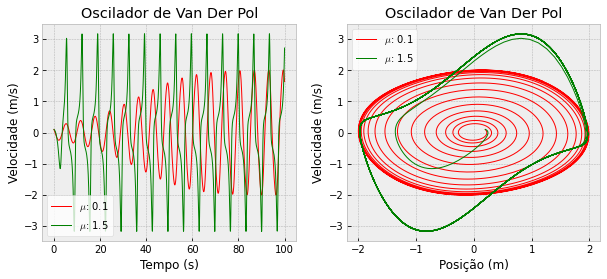

In [ ]:
#Parâmetros:
def A(x):
  return 1

def B(x):
  return 1

def C(x):
  return 1

def r(x):
  return 0

a = 0
b = 100  
pontos = 2000
x0 = 0.2
v0 = 0.1
mi1 = 0.1
mi2 = 0.5
mi3 = 1
mi4 = 1.5

#OBS.: Neste caso não sabemos o instante final (b), saberemos somente pela velocidade final, q ainda será descoberta pela recorrência. Por isso o b colocado é apenas um nº arbitrário

DomX1, Sol_x1, Sol_v1 = dif_vanderpol(A, B, C, r, a, b, pontos, x0, v0, mi1)
DomX2, Sol_x2, Sol_v2 = dif_vanderpol(A, B, C, r, a, b, pontos, x0, v0, mi2)
DomX3, Sol_x3, Sol_v3 = dif_vanderpol(A, B, C, r, a, b, pontos, x0, v0, mi3)
DomX4, Sol_x4, Sol_v4 = dif_vanderpol(A, B, C, r, a, b, pontos, x0, v0, mi4)

plt.style.use('bmh')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex = False, figsize = (10,4))
    
ax1.plot(DomX1, Sol_v1, color='red', linewidth=1.0, label=r'$\mu$: {}'.format(mi1))
#ax1.plot(DomX2, Sol_v2, color='blue', linewidth=1.0, label=r'$\mu$: {}'.format(mi2))
#ax1.plot(DomX3, Sol_v3, color='black', linewidth=1.0, label=r'$\mu$: {}'.format(mi3))
ax1.plot(DomX4, Sol_v4, color='green', linewidth=1.0, label=r'$\mu$: {}'.format(mi4))

ax1.set_title('Oscilador de Van Der Pol')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade (m/s)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.

ax2.plot(Sol_x1, Sol_v1, color='red', linewidth=1.0, label=r'$\mu$: {}'.format(mi1))
#ax2.plot(Sol_x2, Sol_v2, color='blue', linewidth=1.0, label=r'$\mu$: {}'.format(mi2))
#ax2.plot(Sol_x3, Sol_v3, color='black', linewidth=1.0, label=r'$\mu$: {}'.format(mi3))
ax2.plot(Sol_x4, Sol_v4, color='green', linewidth=1.0, label=r'$\mu$: {}'.format(mi4))

ax2.set_title('Oscilador de Van Der Pol')
ax2.set_xlabel('Posição (m)')
ax2.set_ylabel('Velocidade (m/s)')
ax2.legend(loc='best',facecolor ='w')


**Borboleta de Lorenz**

$\frac{{dx}}{{dt}} = \sigma(y-x)$

$\frac{{dy}}{{dt}} = x(ρ-z)-y$

$\frac{{dz}}{{dt}} = xy-\beta z$

In [ ]:
def dif_lorenz(sigma, rho, beta, a, b, pontos, s0):

  DomX, h = Dom_h(a, b, pontos)
  Sol_x = np.empty(DomX.shape)
  Sol_y = np.empty(DomX.shape)
  Sol_z = np.empty(DomX.shape)
  Sol_vx = np.empty(DomX.shape)
  Sol_vy = np.empty(DomX.shape)
  Sol_vz = np.empty(DomX.shape)

  x0 = s0[0]
  y0 = s0[1]
  z0 = s0[2]

  x = h*sigma*y0 + (-h*sigma + 1)*x0
  y = h*x0*(rho - z0) + (-h + 1)*y0
  z = h*x0*y0 - h*beta*z0 + z0

  vx = sigma*(y - x)
  vy = x*(rho - z) - y
  vz = x*y - beta*z

#Adicionando os valores de contorno aos vetores-solução

  Sol_x[0] = x0
  Sol_x[1] = x
  Sol_y[0] = y0
  Sol_y[1] = y
  Sol_z[0] = z0
  Sol_z[1] = z

  Sol_vx[0] = vx
  Sol_vy[0] = vy
  Sol_vz[0] = vz

  for indice in range(2,len(DomX)):

    x = h*sigma*y + (-h*sigma + 1)*x
    y = h*x*(rho - z) + (-h + 1)*y
    z = h*x*y - h*beta*z + z

    Sol_x[indice] = x
    Sol_y[indice] = y
    Sol_z[indice] = z

    vx = sigma*(y - x)
    vy = x*(rho - z) - y
    vz = x*y - beta*z

    Sol_vx[indice] = vx
    Sol_vy[indice] = vy
    Sol_vz[indice] = vz

  return Sol_x, Sol_y, Sol_z, Sol_vx, Sol_vy, Sol_vz



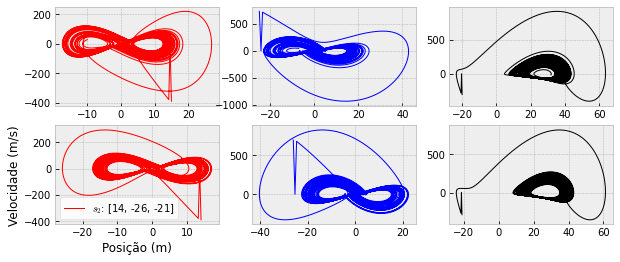

In [ ]:
#Parâmetros:

sigma = 10
rho = 28
beta = 8/3
a = 0
b = 50  
pontos = 50000
s1 = [15,-25,-20]
s2 = [14,-26,-21]

Sol_x1, Sol_y1, Sol_z1, Sol_vx1, Sol_vy1, Sol_vz1 = dif_lorenz(sigma, rho, beta, a, b, pontos, s1)
Sol_x2, Sol_y2, Sol_z2, Sol_vx2, Sol_vy2, Sol_vz2 = dif_lorenz(sigma, rho, beta, a, b, pontos, s2)

plt.style.use('bmh')

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=False, sharex = False, figsize = (10,4))
    
ax1.plot(Sol_x1, Sol_vx1, color='red', linewidth=1.0, label=r'$s_1$: {}'.format(s1))
ax2.plot(Sol_y1, Sol_vy1, color='blue', linewidth=1.0, label=r'$s_1$: {}'.format(s1))
ax3.plot(Sol_z1, Sol_vz1, color='black', linewidth=1.0, label=r'$s_1$: {}'.format(s1))

ax4.plot(Sol_x2, Sol_vx2, color='red', linewidth=1.0, label=r'$s_2$: {}'.format(s2))
ax5.plot(Sol_y2, Sol_vy2, color='blue', linewidth=1.0, label=r'$s_2$: {}'.format(s2))
ax6.plot(Sol_z2, Sol_vz2, color='black', linewidth=1.0, label=r'$s_2$: {}'.format(s2))

ax4.set_xlabel('Posição (m)')
ax4.set_ylabel('Velocidade (m/s)')
ax4.legend(loc='best',facecolor ='w')

Plotagem tridimensional da Borboleta de Lorenz:

Text(0.5, 0, 'z')

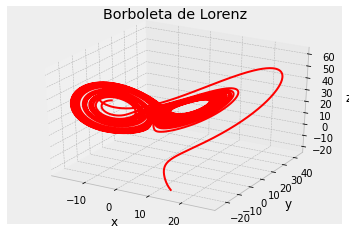

In [ ]:
plt.style.use('bmh')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex = False)
ax1 = plt.axes(projection="3d")
#ax2 = plt.axes(projection="3d")

x1 = Sol_x1
y1 = Sol_y1
z1 = Sol_z1
x2 = Sol_x2
y2 = Sol_y2
z2 = Sol_z2

ax1.plot3D(x1, y1, z1, 'red')
#ax2.plot3D(x2, y2, z2, 'red')
ax1.set_title('Borboleta de Lorenz')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

**Mapa Logístico**

Mais um caso de modelo determinístico que podem ganhar contornos completamente imprevisíveis e caóticos. Este em particula modela o comportamento de uma população:

$x^{n+1} = \mu x^n(1-x_n)$

Onde $x$ é a razão entre a população existente e a máxima população possível em um dado ambiente.

$0 \leq \mu < 1:$ a população morre, independente de $x_0$

$1 \leq \mu < 2:$ a população se aproxima de $\frac{{\mu - 1}}{{\mu}}$, independente de $x_0$

$2 \leq \mu < 3:$ a população se aproxima de $\frac{{\mu - 1}}{{\mu}}$, entretanto mais lentamente

$3 \leq \mu < 1 + 6^{1/2} (3.44949) :$ a população flutuará permanentemente entre dois valores fixos, dependentes do parâmetro $\mu$

$3.44949 \leq \mu < 3.54409 :$ a população flutuará permanentemente entre quatro valores fixos

$\mu \geq 3.54409:$ a população apresenta comportamento caótico. Este ponto é conhecido como o início do
caos.

In [ ]:
def mapa_logistico(mi,a, b, pontos, x0):

  DomX, h = Dom_h(a, b, pontos)
  Sol_x = np.empty(DomX.shape)

  #x = mi*x0**0*(1 - x0)
  x = mi*x0*(1 - x0)

#Adicionando os valores de contorno aos vetores-solução

  Sol_x[0] = x0
  Sol_x[1] = x

  for indice in range(2,len(DomX)):
    #x = mi*x**indice*(1 - x)
    x = mi*x*(1 - x)
    Sol_x[indice] = x

  return DomX, Sol_x



Text(0, 0.5, 'Razão de população')

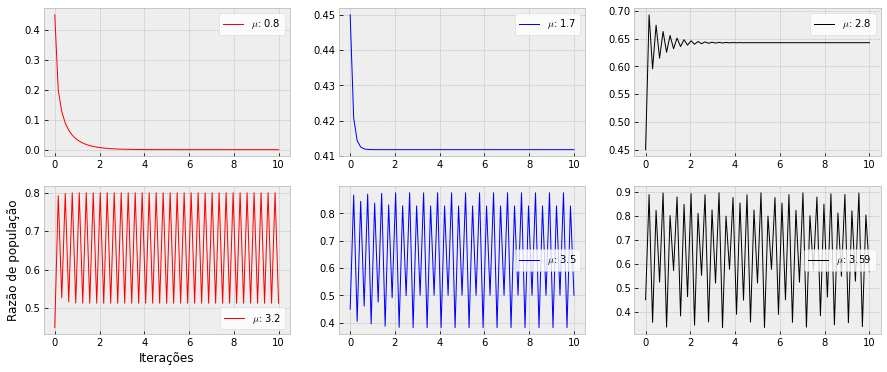

In [ ]:
#Parâmetros:

mi = [0.80,1.70,2.80,3.20,3.50,3.59]
a = 0
b = 10  #Para a curva aparecer completa o domínio precisar ser maior que 0.0001 (note que vlim ~ 0.00006)
pontos = 65
x0 = 0.45

DomX1, Sol_x1 = mapa_logistico(mi[0], a, b, pontos, x0)
DomX2, Sol_x2 = mapa_logistico(mi[1], a, b, pontos, x0)
DomX3, Sol_x3 = mapa_logistico(mi[2], a, b, pontos, x0)
DomX4, Sol_x4 = mapa_logistico(mi[3], a, b, pontos, x0)
DomX5, Sol_x5 = mapa_logistico(mi[4], a, b, pontos, x0)
DomX6, Sol_x6 = mapa_logistico(mi[5], a, b, pontos, x0)

#GRÁFICOS DE RAZÃO DE POPULAÇÃO X ITERAÇÕES

plt.style.use('bmh')

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=False, sharex = False, figsize = (15,6))
    
ax1.plot(DomX1, Sol_x1, color='red', linewidth=1.0, label=r'$\mu$: {}'.format(mi[0]))
ax2.plot(DomX2, Sol_x2, color='blue', linewidth=1.0, label=r'$\mu$: {}'.format(mi[1]))
ax3.plot(DomX3, Sol_x3, color='black', linewidth=1.0, label=r'$\mu$: {}'.format(mi[2]))
ax4.plot(DomX4, Sol_x4, color='red', linewidth=1.0, label=r'$\mu$: {}'.format(mi[3]))
ax5.plot(DomX3, Sol_x5, color='blue', linewidth=1.0, label=r'$\mu$: {}'.format(mi[4]))
ax6.plot(DomX4, Sol_x6, color='black', linewidth=1.0, label=r'$\mu$: {}'.format(mi[5]))

ax1.legend(loc='best',facecolor ='w')
ax2.legend(loc='best',facecolor ='w')
ax3.legend(loc='best',facecolor ='w')
ax4.legend(loc='best',facecolor ='w')
ax5.legend(loc='best',facecolor ='w')
ax6.legend(loc='best',facecolor ='w')

ax4.set_xlabel('Iterações')
ax4.set_ylabel('Razão de população')

#GRÁFICOS DE RAZÃO DE POPULAÇÃO X MI
#NÃO CONSEGUI FAZER

In [ ]:

'''
def mapaXmi(mi,mi_a, mi_b, mi_pontos, a, b, pontos, x0):

  Sol_MapaXmi = []
  faixa_mi = np.linspace(mi_a, mi_b, mi_pontos)

  for mi in faixa_mi:
    DomX, Sol_x = mapa_logistico(mi, a, b, pontos, x0)
    
    Sol_x_ = Sol_x.tolist()
    
    for i in range(50,65):
      if Sol_x.count(Sol_x[i]) >= 2:
        Sol_MapaXmi.append(Sol_x[i])
      
      else:
'''    

'\ndef mapaXmi(mi,mi_a, mi_b, mi_pontos, a, b, pontos, x0):\n\n  Sol_MapaXmi = []\n  faixa_mi = np.linspace(mi_a, mi_b, mi_pontos)\n\n  for mi in faixa_mi:\n    DomX, Sol_x = mapa_logistico(mi, a, b, pontos, x0)\n    \n    Sol_x_ = Sol_x.tolist()\n    \n    for i in range(50,65):\n      if Sol_x.count(Sol_x[i]) >= 2:\n        Sol_MapaXmi.append(Sol_x[i])\n      \n      else:\n'

$A\frac{{d^2f(x)}}{{dx^2}} + B\frac{{df(x)}}{{dx}} + Cf(x) + r(x) = 0$

$f(a) = y_a, $
$f(b) = y_b$


---


Usando as diferenças finitas centradas de 2 e 3 pontos para a 1ª e 2ª derivadas respectivamente, ter-se-á:

*  $\frac{{df(x)}}{{dx}} \approx \frac{{f(x_{{j+1}})-f(x_{{j-1}})}}{{2h}}$
*  $\frac{{d^2f(x)}}{{dx^2}} \approx \frac{{f(x_{{j+1}})-2f(x_j)+f(x_{{j-1}})}}{{h^2}}$

Onde h é espaçamento da sua malha. Em seguida, ao discretizar a equação diferencial e agrupar os coeficientes de cada termo $f_{{j-1}}$, $f_{{j}}$ e $f_{{j+1}}$, obtem-se a seguinte equação do nó geral:

*  $(2A - Bh).f_{{j-1}} + (-4A + 2Ch^2).f_{{j}} + (2A + Bh).f_{{j+1}} = -2h^2.r(x_j)$

Com os coeficientes dessas variáveis será montado a matriz de coeficientes de um sistema linear. Perceba ainda que a função conhecida r(x) fica do outro lado da equação, onde será o vetor dos termos independentes.

Construção do vetor de termos independentes

In [ ]:
#M.X = I

##Vetor de termos independentes (função que gera I)
def gerarI(DomX, h, A, B, ya, yb, r):
  I = np.empty(DomX.size - 2)

  #É necessário adicionar os valores de contorno conhecidos ao vetor B:

  a_index = 0
  b_index = -1

  #É dado que y(a)=ya e y(b)=yb, ou seja, y(X[a_index])=ya e y(X[b_index])=yb    

  I[a_index] = -(2*A(DomX[a_index]) - B(DomX[a_index])*h)*ya - 2*h**2*r(a_index)
  I[b_index] = -(2*A(DomX[b_index]) + B(DomX[b_index])*h)*yb - 2*h**2*r(b_index)
  
  for indice in range(1,len(DomX) - 3):
  
    I[indice] = -2*h**2*r(DomX[indice])   #adicionando os valores de r(x) em B

  '''!!!Veja que posso tratar parâmetros da função como se também fossem funções a receber argumentos. 
  Isso é importante porque nem sempre A, B e C serão constantes. Podemos ter
  coeficientes também dependentes de x, o que nos faria lidar com uma equação não linear. As funções a ocuparem o espaço desses
  parâmetros só serão fornecidas mais a frente!!!!'''

  return I

O vetor de termos independentes está completo, agora se constrói a matriz de coeficientes. Como y(X[a_index]) e y(X[b_index]) são dados, não faz sentido montar um sistema linear com y(a) e y(b) inclusos, então excluiremos os dois valores correspondentes a y(a) e y(b) no vetor de termos independentes. Perceba que teremos como consequência disso dois valores a menos no vetor B e duas colunas a menos na matriz de coeficientes (M).

In [ ]:
#Matriz de coeficientes (função que gera M)
def gerarM(DomX, h, A, B, C):
  M = np.zeros([DomX.size - 2,DomX.size -2])

  #Inserindo a primeira e última linhas manualmente:

  M[0,0] = (-4*A(DomX[1]) + 2*C(DomX[1])*h**2)      #primeira linha 
  M[0,1] = (2*A(DomX[2]) + B(DomX[2])*h)

  M[-1,-2] = (2*A(DomX[-3]) - B(DomX[-3])*h)          #última linha
  M[-1,-1] = (-4*A(DomX[-2]) + 2*C(DomX[-2])*h**2)

  #Inserindo as restantes:

  for linha in range(1,len(DomX) - 3):
    M[linha,linha-1] = (2*A(DomX[linha]) - B(DomX[linha])*h)
    M[linha,linha] = (-4*A(DomX[linha]) + 2*C(DomX[linha])*h**2)
    M[linha,linha+1] = (2*A(DomX[linha]) + B(DomX[linha])*h)

  return M

Diferenças Finitas

In [ ]:
#função de diferenças finitas (retorna domínio e imagem)
def dif_metmat(A, B, C, r, a, b, pontos, ya, yb):
  
  DomX, h = Dom_h(a, b, pontos)
  I = gerarI(DomX, h, A, B, ya, yb, r)
  M = gerarM(DomX, h, A, B, C)

  Sol = np.linalg.solve(M,I)
  
  SolO = np.array([ya])
  Solf = np.array([yb])

  Sol = np.concatenate((SolO,Sol,Solf))

  return DomX, Sol


Movimento de um corpo em movimento retilíneo amortecido via diferenças finitas de MetMat:

$m\frac{{dv(t)}}{{dt}} + bv(t) = 0$


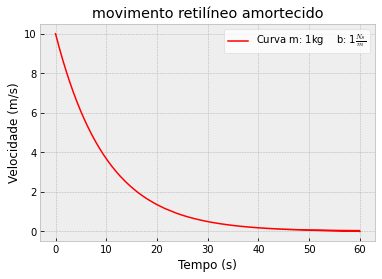

In [ ]:
#Parâmetros:
def A(x):
  return 0

def B(x):
  return 1

def C(x):
  return 0.1

def r(x):
  return 0

a1 = 0
b1 = 60
pontos1 = 600
ya1 = 10
yb1 = 0

DomX, Sol = dif_metmat(A, B, C, r, a1, b1, pontos1, ya1, yb1)    #para referenciar funções nos argumentos de outra função, basta escrever seu nome sem parênteses

plt.style.use('bmh')

fig, (ax1) = plt.subplots()
    
ax1.plot(DomX, Sol, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$'.format(1,B(0)))
ax1.set_title('movimento retilíneo amortecido')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade (m/s)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.

Solução da equação abaixo via diferenças finitas de MetMat:

A $\frac{{d^2f(t)}}{{dt^2}} + B\frac{{df(t)}}{{dt}} + sin(t)f(t) + r(t) = 0$ onde $\xi = \frac{{B}}{{2A\omega_n}}$, $\omega_n^2 = \frac{{C}}{{A}}$

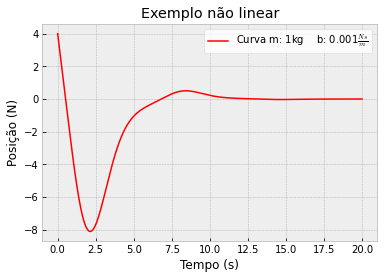

In [ ]:
def A(x):
  return 1

def B(x):
  return 0.001

def C(x):
  return np.sin(x)

def r(x):
  return 0

a3 = 0
b3 = 20
pontos3 = 500
ya3 = 4
yb3 =  0

DomX, Sol = dif_metmat(A, B, C, r, a3, b3, pontos3, ya3, yb3)

plt.style.use('bmh')

fig, (ax1) = plt.subplots()
    
ax1.plot(DomX, Sol, color='red', linewidth=1.5, label=r'Curva m: {}kg    b: {}$\frac{{N s}}{{m}}$'.format(A(0),B(0)))
ax1.set_title('Exemplo não linear')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Posição (N)')
ax1.legend(loc='best',facecolor ='w')   #Além de definir a label da curva no plot, para a legenda aparecer é necessário usar este método.

Equação de Poisson: problema de transferência de calor estacionário

$\alpha\frac{\partial^2 T}{\partial x^2} + Q = 0 \;\; , \;\; \alpha = 0.1 \frac{kJm^2}{K} \;\; , \;\; Q = 0.2 kJ$

$T(x=0) = 0$

$T(x=L) = 1$

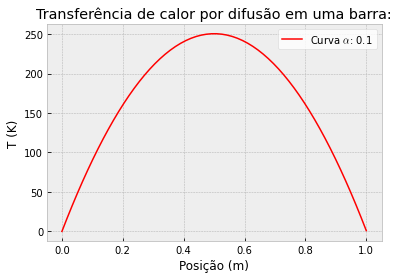

In [ ]:
def A(x):
  return 0.1

def B(x):
  return 0

def C(x):
  return 0

def r(x):
  return 200

xo = 0
xf = 1
pontos = 60
To = 0
Tf =  1

DomX, Sol = dif_metmat(A,B,C,r,xo,xf,pontos,To,Tf)

plt.style.use('bmh')

fig, (ax1) = plt.subplots()
    
ax1.plot(DomX, Sol, color='red', linewidth=1.5, label=r'Curva $\alpha$: {}'.format(A(0)))
ax1.set_title('Transferência de calor por difusão em uma barra:')
ax1.set_xlabel('Posição (m)')
ax1.set_ylabel('T (K)')
ax1.legend(loc='best',facecolor ='w')

### EDPs

$A(x,y)\frac{\partial^2 T}{\partial x^2} + B(x,y)\frac{\partial^2 T}{\partial x \partial y} + C(x,y)\frac{\partial^2 T}{\partial y^2} + D(x,y)\frac{\partial T}{\partial x} + E(x,y)\frac{\partial T}{\partial y} + F(x,y)T = G(x,y)$

$B^2 - 4AC < 0:$ Elíptico (problemas dissipativos, associados a processos difusivos estacionários). Ex.: Equação de Poisson

$B^2 - 4AC = 0:$ Parabólico (problemas dissipativos, associados a processos difusivos transientes). Ex.: Equação de calor

$B^2 - 4AC > 0:$ Hiperbólico (problemas advectivos, associados a processos de transporte não-difusivos transientes. Um termo expressando velocidade vem acompanhando uma das derivadas da EDP)

$Problemas \; mistos:$ EDPs parabólicas e hiperbólicas

**Obs.: Convecção = difusão + advecção**

Equação de Poisson (EDP Elíptica):

$\nabla^2 T(x,y) = g(x)$

Equação de Calor (EDP Parabólica):

$\frac{\partial T(x,y,t)}{\partial t} = \alpha \nabla^2 T(x,y,t)$

Equação de Onda (EDP hiperbólica):

$\frac{\partial^2 T(x,y,t)}{\partial t^2} = \lambda^2 \nabla^2 T(x,y,t)$

Problema misto:

$\frac{\partial T(x,t)}{\partial t} + u\frac{\partial T(x,t)}{\partial x} = \alpha \frac{\partial^2 T(x,t)}{\partial x^2}$

Se derivada espacial de 1ª ordem tende a zero, o problema é hiperbólico; se derivada espacial de 2ª ordem tende a zero, problema é parabólico.

#### Problema de transferência de calor transiente (método explícito):

*   Derivada centrada para o espaço e **avançada** para o tempo
*   Recursivo
*   Instável


Neste método temos duas recorrências, para cada N no tempo , haverá uma recorrência para i no espaço. Após obter a temperatura para cada ponto i no instante N, se avança na recorrência no tempo.


Problema de transferência de calor transiente

$\frac{\partial T}{\partial t} = \alpha\frac{\partial^2 T}{\partial x^2} + Q \;\; , \;\; \alpha = 0.1 \frac{kJm^2}{K} \;\; , \;\; Q = 0.2 kJ$

$T(x,t=0) = 0$

$T(x=0,t) = 0$

$T(x=L,t) = 1$

**Obs.: Veja que, ao dar os valores de T nas extremidades de x, não dependemos de nós fictícios para ter os valores de T nessas extremidades e, consequentemente, não dependemos de fluxos prescritos nas condições de contorno**

In [ ]:
def dif_explicita1(alpha, Q, Tto, To, Tf, xo, xf, to, tf, pontosX, pontost):
  DomX, hx = Dom_h(xo, xf, pontosX)
  Domt, ht = Dom_h(to, tf, pontost)
  Sol_T = np.empty((Domt.shape[0],DomX.shape[0]))
  print(Sol_T.shape)

  if ht < hx**2/(2*alpha):
    #Temperaturas em cada ponto no instante t = 0 (1ª C.C.)
    t0 = np.ones(DomX.shape)
    t0 = t0*Tto
    Sol_T[0] = t0 

    for t in range(1,len(Domt)):
    
      #1º ponto da barra (2ª C.C.)
      Sol_T[t,0] = To 

      for x in range(1,len(DomX)-1):
      
        T = (alpha*ht/hx**2)*Sol_T[t-1,x-1] + (1 - 2*alpha*ht/hx**2)*Sol_T[t-1,x] + (alpha*ht/hx**2)*Sol_T[t-1,x+1] + ht*Q
        Sol_T[t,x] = T

      #Último ponto da barra (2ª C.C.)
      Sol_T[t,-1] = Tf

    return DomX, Domt, Sol_T

  else:
      print("Solução não converge para os parâmetros dados.")

(10800, 60)


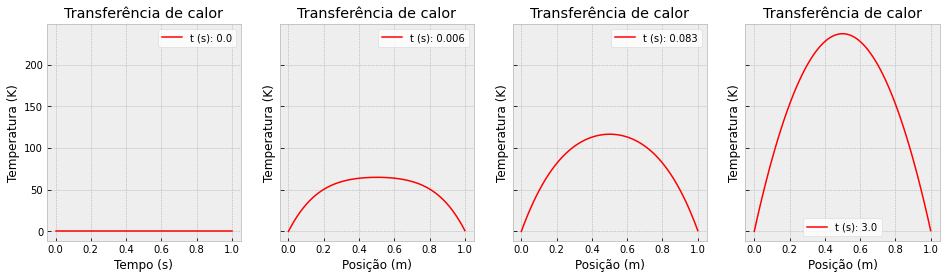

In [ ]:
#Parâmetros: alpha, Q, Tto, To, Tf, xo, xf, to, tf, pontosX, pontost

alpha = 0.1
Q = 200
Tto = 0
To = 0
Tf = 1
xo = 0
xf = 1
to = 0
tf = 3
pontosX = 60
pontost = 10800

DomX, Domt, Sol_T = dif_explicita1(alpha, Q, Tto, To, Tf, xo, xf, to, tf, pontosX, pontost)    #para referenciar funções nos argumentos de outra função, basta escrever seu nome sem parênteses

plt.style.use('bmh')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex = True, figsize = (16,4))
    
ax1.plot(DomX, Sol_T[0,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[0],3)))
ax1.set_title('Transferência de calor')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Temperatura (K)')
ax1.legend(loc='best',facecolor ='w')

ax2.plot(DomX, Sol_T[1200,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[20],3)))
ax2.set_title('Transferência de calor')
ax2.set_xlabel('Posição (m)')
ax2.set_ylabel('Temperatura (K)')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(DomX, Sol_T[2400,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[300],3)))
ax3.set_title('Transferência de calor')
ax3.set_xlabel('Posição (m)')
ax3.set_ylabel('Temperatura (K)')
ax3.legend(loc='best',facecolor ='w')

ax4.plot(DomX, Sol_T[-1,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[-1],3)))
ax4.set_title('Transferência de calor')
ax4.set_xlabel('Posição (m)')
ax4.set_ylabel('Temperatura (K)')
ax4.legend(loc='best',facecolor ='w')

Problema de transferência de calor transiente

$\frac{1}{\alpha}\frac{\partial T(x,t)}{\partial t} = \frac{\partial^2 T(x,t)}{\partial x^2} - m^2(T - T_{\infty})$

$T(x=0,t) = T_b$

$T(x,t=0) = T_{\infty}$

$k\frac{\partial T(x,t)}{\partial x} + h(T - T_{\infty}) = 0$

In [ ]:
def dif_explicita2(alpha, m, Tb, Tinf, k, h, xo, xf, to, tf, pontosX, pontost):

  DomX, hx = Dom_h(xo, xf, pontosX)
  Domt, ht = Dom_h(to, tf, pontost)
  Sol_T = np.empty((Domt.shape[0],DomX.shape[0]))
  print(Sol_T.shape)

  if ht < 1/((2*alpha)/hx**2 +alpha*m**2):
    #Temperaturas em cada ponto no instante t = 0 (1ª C.C.)
    t0 = np.ones(DomX.shape)
    t0 = t0*Tb
    Sol_T[0] = t0 

    for t in range(1,len(Domt)):
    
      #1º ponto da barra (2ª C.C.)
      T0 = Tb
      Sol_T[t,0] = T0 

      for x in range(1,len(DomX)-1):
      
        T = (alpha*ht/hx**2)*Sol_T[t-1,x-1] + (1 - 2*alpha*ht/hx**2 - alpha*ht*m**2)*Sol_T[t-1,x] + (alpha*ht/hx**2)*Sol_T[t-1,x+1] + alpha*ht*m**2*Tinf
        Sol_T[t,x] = T

      #Último ponto da barra depende de nó fictício (3ª C.C.)
      xfic = Sol_T[t-1, -2] - (2*hx*h/k)*Sol_T[t-1,-1] + (2*hx*h/k)*Tinf
      Tf = (alpha*ht/hx**2)*Sol_T[t-1,x-1] + (1 - 2*alpha*ht/hx**2 - alpha*ht*m**2)*Sol_T[t-1,x] + (alpha*ht/hx**2)*xfic + alpha*ht*m**2*Tinf
      Sol_T[t,-1] = Tf

    return DomX, Domt, Sol_T

  else:
      print("Solução não converge para os parâmetros dados.")

(3600, 60)


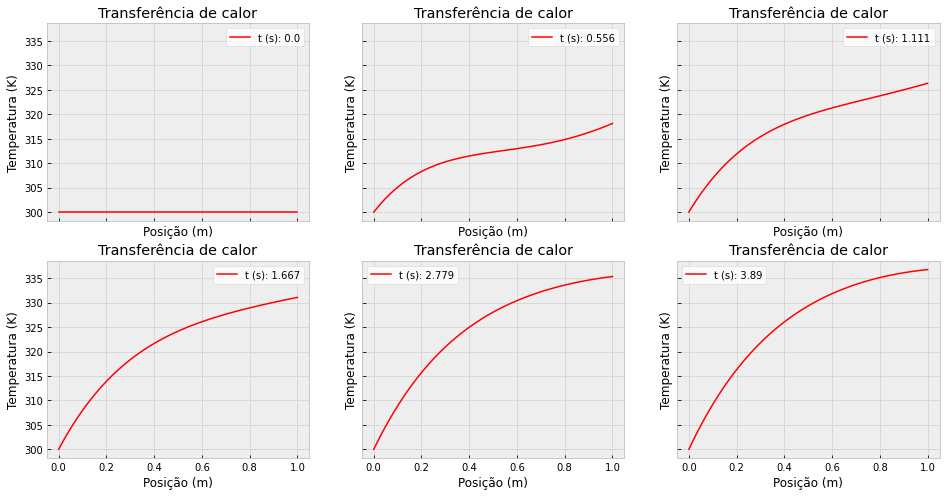

In [ ]:
#Parâmetros: alpha, m, Tb, Tinf, k, h, xo, xf, to, tf, pontosX, pontost

alpha = 0.1
m = 2.466
Tb = 300
Tinf = 343
k = 80
h = 100
xo = 0
xf = 1
to = 0
tf = 5
pontosX = 60
pontost = 3600

DomX, Domt, Sol_T = dif_explicita2(alpha, m, Tb, Tinf, k, h, xo, xf, to, tf, pontosX, pontost)    #para referenciar funções nos argumentos de outra função, basta escrever seu nome sem parênteses

plt.style.use('bmh')

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, sharex = True, figsize = (16,8))
    
ax1.plot(DomX, Sol_T[0,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[0],3)))
ax1.set_title('Transferência de calor')
ax1.set_xlabel('Posição (m)')
ax1.set_ylabel('Temperatura (K)')
ax1.legend(loc='best',facecolor ='w')

ax2.plot(DomX, Sol_T[400,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[400],3)))
ax2.set_title('Transferência de calor')
ax2.set_xlabel('Posição (m)')
ax2.set_ylabel('Temperatura (K)')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(DomX, Sol_T[800,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[800],3)))
ax3.set_title('Transferência de calor')
ax3.set_xlabel('Posição (m)')
ax3.set_ylabel('Temperatura (K)')
ax3.legend(loc='best',facecolor ='w')

ax4.plot(DomX, Sol_T[1200,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[1200],3)))
ax4.set_title('Transferência de calor')
ax4.set_xlabel('Posição (m)')
ax4.set_ylabel('Temperatura (K)')
ax4.legend(loc='best',facecolor ='w')

ax5.plot(DomX, Sol_T[2000,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[2000],3)))
ax5.set_title('Transferência de calor')
ax5.set_xlabel('Posição (m)')
ax5.set_ylabel('Temperatura (K)')
ax5.legend(loc='best',facecolor ='w')

ax6.plot(DomX, Sol_T[2800,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[2800],3)))
ax6.set_title('Transferência de calor')
ax6.set_xlabel('Posição (m)')
ax6.set_ylabel('Temperatura (K)')
ax6.legend(loc='best',facecolor ='w')

#### Problema de transferência de calor transiente (método implícito):

*   Derivada centrada para o espaço e **atrasada** para o tempo
*   Sistema linear
*   Estável

Para cada instante N, haverá um sistema linear para se obter os valores de T em cada nó i do domínio X.


$\frac{\partial T}{\partial t} = \alpha\frac{\partial^2 T}{\partial x^2} + Q \;\; , \;\; \alpha = 0.1 \frac{kJm^2}{K} \;\; , \;\; Q = 0.2 kJ$

$T(x,t=0) = 0$

$T(x=0,t) = 0$

$f(x=L,t) = 1$

In [ ]:
def dif_implicita1(alpha, Q, Tto, To, Tf, xo, xf, to, tf, pontosX, pontost):
  DomX, hx = Dom_h(xo, xf, pontosX)
  Domt, ht = Dom_h(to, tf, pontost)
  Sol_T = np.empty((Domt.shape[0],DomX.shape[0]))

  ###Temperaturas em cada ponto no instante t = 0 (1ª C.C.)
  t0 = np.ones(DomX.shape)
  t0 = t0*Tto
  Sol_T[0] = t0 

  ###Já temos a 1ª linha como C.C., faremos agora a 2ª manualmente e em seguida as demais por recorrência

  ##Vetor de termos independentes para N = 1:
  
  #I = Sol_T[0,1:-1]   !!!ATENÇÃO: Definindo I desta forma, quando mudarmos uma propriedade em I também estaremos mudando em Sol_T!!!
  I = np.empty(Sol_T[0,1:-1].shape)
  
  #É necessário adicionar os valores de contorno conhecidos ao vetor B:
  a_index = 0
  b_index = -1

  I[a_index] = ((alpha*ht)/(hx**2))*To + Tto + ht*Q
  I[b_index] = ((alpha*ht)/(hx**2))*Tf + Tto + ht*Q

  for indice in range(1,len(DomX) - 3):
  
    I[indice] = Tto + ht*Q   #adicionando os valores de r(x) em B

  ##Matriz de coeficientes
  M = np.zeros([DomX.size - 2,DomX.size -2])

  #Inserindo a primeira e última linhas manualmente:
  M[0,0] = (1 + (2*alpha*ht)/(hx**2))      #primeira linha 
  M[0,1] = -(alpha*ht)/(hx**2)

  M[-1,-2] = -(alpha*ht)/(hx**2)          #última linha
  M[-1,-1] = (1 + (2*alpha*ht)/(hx**2))

  #Inserindo as restantes:
  for linha in range(1,len(DomX) - 3):
    M[linha,linha-1] = -(alpha*ht)/(hx**2)
    M[linha,linha] = (1 + (2*alpha*ht)/(hx**2))
    M[linha,linha+1] = -(alpha*ht)/(hx**2)

  ##Valores de T ao longo de X para o instante N
  T = np.linalg.solve(M,I)
  
  So = np.array([To])
  Sf = np.array([Tf])
  T = np.concatenate((So,T,Sf))

  Sol_T[1] = T

  ###Fizemos a 2ª linha de temperaturas a partir da 1ª, agora faremos as restantes
  for t in range(2,len(Domt)):
    I = np.empty(T.shape[0] - 2)

  #É necessário adicionar os valores de contorno conhecidos ao vetor B:
    I[0] = ((alpha*ht)/hx**2)*To + T[1] + ht*Q
    I[-1] = ((alpha*ht)/hx**2)*Tf + T[-2] + ht*Q
  
    for indice in range(1,T.shape[0] - 3):
  
      I[indice] = T[indice+1] + ht*Q 

    T = np.linalg.solve(M,I)

    So = np.array([To])
    Sf = np.array([Tf])
    T = np.concatenate((So,T,Sf))

    Sol_T[t] = T

  return DomX, Domt, Sol_T

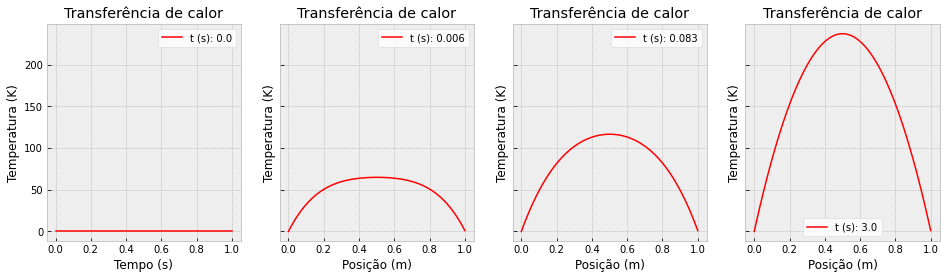

In [ ]:
#Parâmetros: alpha, Q, Tto, To, Tf, xo, xf, to, tf, pontosX, pontost

alpha = 0.1
Q = 200
Tto = 0
Tf = 1
xo = 0
xf = 1
to = 0
tf = 3
pontosX = 60
pontost = 10800

DomX, Domt, Sol_T = dif_implicita1(alpha, Q, Tto, To, Tf, xo, xf, to, tf, pontosX, pontost)    #para referenciar funções nos argumentos de outra função, basta escrever seu nome sem parênteses

plt.style.use('bmh')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex = True, figsize = (16,4))
    
ax1.plot(DomX, Sol_T[0,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[0],3)))
ax1.set_title('Transferência de calor')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Temperatura (K)')
ax1.legend(loc='best',facecolor ='w')

ax2.plot(DomX, Sol_T[1200,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[20],3)))
ax2.set_title('Transferência de calor')
ax2.set_xlabel('Posição (m)')
ax2.set_ylabel('Temperatura (K)')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(DomX, Sol_T[2400,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[300],3)))
ax3.set_title('Transferência de calor')
ax3.set_xlabel('Posição (m)')
ax3.set_ylabel('Temperatura (K)')
ax3.legend(loc='best',facecolor ='w')

ax4.plot(DomX, Sol_T[-1,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[-1],3)))
ax4.set_title('Transferência de calor')
ax4.set_xlabel('Posição (m)')
ax4.set_ylabel('Temperatura (K)')
ax4.legend(loc='best',facecolor ='w')

#### Solução da equação de onda (método implícito):

Solução da Equação de Onda:

$\frac{\partial^2 f(x,t)}{\partial t^2} = c^2\frac{\partial^2 f(x,t)}{\partial x^2}$

$f(x,t=0) = x$

$\frac{\partial f(x,t=0)}{\partial t} = 0$

$f(x=0,t) = 0$

$\frac{\partial f(x=L,t)}{\partial x} = 0$

In [ ]:
def dif_implicita_onda(c, To, Tf, xo, xf, to, tf, pontosX, pontost):
  DomX, hx = Dom_h(xo, xf, pontosX)
  Domt, ht = Dom_h(to, tf, pontost)
  Sol_T = np.empty((Domt.shape[0],DomX.shape[0]))

  ###Temperaturas em cada ponto no instante t = 0 (1ª C.C.)
  #Tto = DomX
  Tto = np.zeros(DomX.shape)
  #Tto = np.sin(DomX)
  Sol_T[0] = Tto

  ###Já temos a 1ª linha como C.C., faremos agora a 2ª manualmente e em seguida as demais por recorrência

  ##Vetor de termos independentes para N = 1:
  
  #I = Sol_T[0,1:-1]   !!!ATENÇÃO: Definindo I desta forma, quando mudarmos uma propriedade em I também estaremos mudando em Sol_T!!!
  I = np.empty(Sol_T[0,1:-1].shape)
  
  #É necessário adicionar os valores de contorno conhecidos ao vetor B:
  
  I[0] = 2*Sol_T[0,1] - Sol_T[0,1] + ((c*ht)/hx)**2*To
  
  '''
  I[0] = 2*Sol_T[0,1] - (-ht*np.sin(DomX[1]) + Sol_T[0,1]) + ((c*ht)/hx)**2*To
  I[-1] = 2*Sol_T[0,-2] - (-ht*np.sin(DomX[-2]) + Sol_T[0,-2]) + ((c*ht)/hx)**2*Tf
  '''
  for indice in range(1,len(DomX) - 3):
  
    I[indice] = 2*Sol_T[0,indice+1] - Sol_T[0,indice+1]   #adicionando os valores de r(x) em B

  I[-1] = 2*Sol_T[0,-2] - Sol_T[0,-2] + ((c*ht)/hx)**2*Tf

  ##Matriz de coeficientes
  M = np.zeros([DomX.size - 2,DomX.size -2])

  #Inserindo a primeira e última linhas manualmente:
  M[0,0] = (1 + 2*((c*ht)/hx)**2)      #primeira linha 
  M[0,1] = -((c*ht)/hx)**2

  M[-1,-2] = -((c*ht)/hx)**2         #última linha
  M[-1,-1] = (1 + 2*((c*ht)/hx)**2)

  #Inserindo as restantes:
  for linha in range(1,len(DomX) - 3):
    M[linha,linha-1] = -((c*ht)/hx)**2
    M[linha,linha] = (1 + 2*((c*ht)/hx)**2)
    M[linha,linha+1] = -((c*ht)/hx)**2

  ##Valores de T ao longo de X para o instante N
  T = np.linalg.solve(M,I)
  
  So = np.array([To])
  Sf = np.array([Tf])
  T = np.concatenate((So,T,Sf))

  Sol_T[1] = T

  ###Fizemos a 2ª linha de temperaturas a partir da 1ª, agora faremos as restantes
  for t in range(2,len(Domt)):
    I = np.empty(T.shape[0] - 2)

  #É necessário adicionar os valores de contorno conhecidos ao vetor B:
    
    I[0] = 2*Sol_T[t-1,1] - Sol_T[t-2,1] + ((c*ht)/hx)**2*To
    
    '''
    I[0] = 2*Sol_T[t-1,1] - (-ht*np.sin(DomX[1]) + Sol_T[t-2,1]) + ((c*ht)/hx)**2*To
    I[-1] = 2*Sol_T[t-1,-2] - (-ht*np.sin(DomX[-2]) + Sol_T[t-2,-2]) + ((c*ht)/hx)**2*Tf  
    '''
    for indice in range(1,T.shape[0] - 3):
  
      I[indice] = 2*Sol_T[t-1,indice+1] - Sol_T[t-2,indice+1]

    I[-1] = 2*Sol_T[t-1,-2] - Sol_T[t-2,-2] + ((c*ht)/hx)**2*Tf

    T = np.linalg.solve(M,I)

    So = np.array([To])
    Sf = np.array([Tf])
    T = np.concatenate((So,T,Sf))

    Sol_T[t] = T

  return DomX, Domt, Sol_T

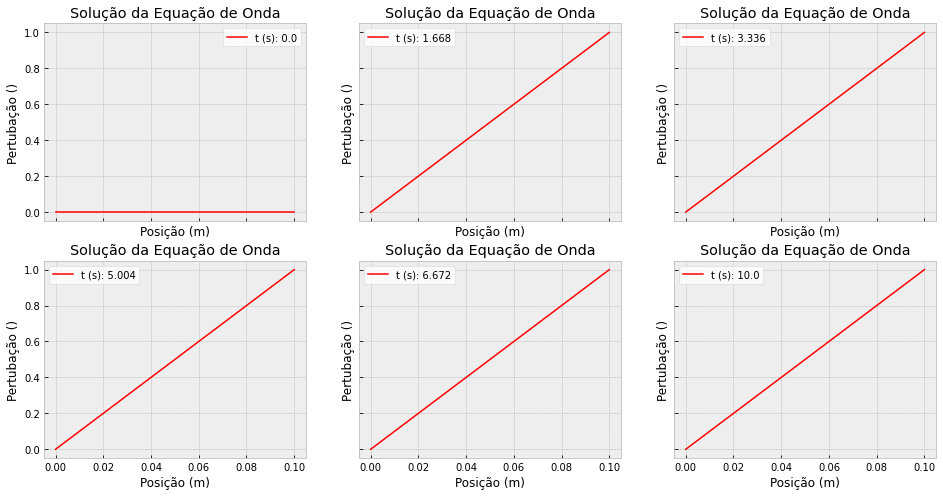

In [ ]:
#Parâmetros: c, To, Tf, xo, xf, to, tf, pontosX, pontost

c = 10
To = 0
Tf = 1
xo = 0
xf = 0.1
to = 0
tf = 10
pontosX = 300
pontost = 1200

DomX, Domt, Sol_T = dif_implicita_onda(c, To, Tf, xo, xf, to, tf, pontosX, pontost)    #para referenciar funções nos argumentos de outra função, basta escrever seu nome sem parênteses

plt.style.use('bmh')
'''
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex = True, figsize = (16,4))
    
ax1.plot(DomX, Sol_T[0,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[0],3)))
ax1.set_title('Solução da Equação de Onda')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Pertubação ()')
ax1.legend(loc='best',facecolor ='w')

ax2.plot(DomX, Sol_T[400,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[400],3)))
ax2.set_title('Solução da Equação de Onda')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Pertubação ()')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(DomX, Sol_T[800,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[800],3)))
ax3.set_title('Solução da Equação de Onda')
ax3.set_xlabel('Tempo (s)')
ax3.set_ylabel('Pertubação ()')
ax3.legend(loc='best',facecolor ='w')

ax4.plot(DomX, Sol_T[-1,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[-1],3)))
ax4.set_title('Solução da Equação de Onda')
ax4.set_xlabel('Tempo (s)')
ax4.set_ylabel('Pertubação ()')
ax4.legend(loc='best',facecolor ='w')
'''

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, sharex = True, figsize = (16,8))
    
ax1.plot(DomX, Sol_T[0,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[0],3)))
ax1.set_title('Solução da Equação de Onda')
ax1.set_xlabel('Posição (m)')
ax1.set_ylabel('Pertubação ()')
ax1.legend(loc='best',facecolor ='w')

ax2.plot(DomX, Sol_T[200,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[200],3)))
ax2.set_title('Solução da Equação de Onda')
ax2.set_xlabel('Posição (m)')
ax2.set_ylabel('Pertubação ()')
ax2.legend(loc='best',facecolor ='w')

ax3.plot(DomX, Sol_T[400,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[400],3)))
ax3.set_title('Solução da Equação de Onda')
ax3.set_xlabel('Posição (m)')
ax3.set_ylabel('Pertubação ()')
ax3.legend(loc='best',facecolor ='w')

ax4.plot(DomX, Sol_T[600,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[600],3)))
ax4.set_title('Solução da Equação de Onda')
ax4.set_xlabel('Posição (m)')
ax4.set_ylabel('Pertubação ()')
ax4.legend(loc='best',facecolor ='w')

ax5.plot(DomX, Sol_T[800,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[800],3)))
ax5.set_title('Solução da Equação de Onda')
ax5.set_xlabel('Posição (m)')
ax5.set_ylabel('Pertubação ()')
ax5.legend(loc='best',facecolor ='w')

ax6.plot(DomX, Sol_T[1199,:], color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[1199],3)))
ax6.set_title('Solução da Equação de Onda')
ax6.set_xlabel('Posição (m)')
ax6.set_ylabel('Pertubação ()')
ax6.legend(loc='best',facecolor ='w')

(300,)


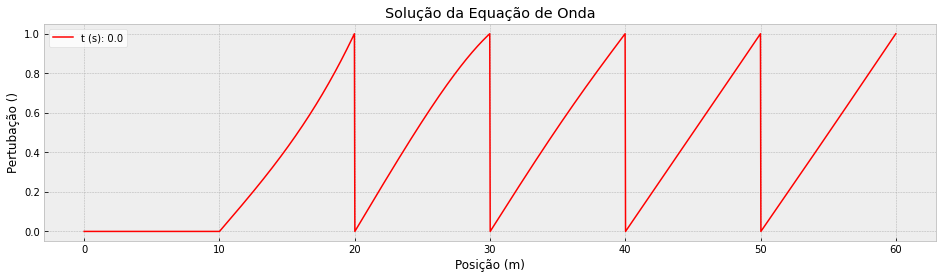

In [ ]:
DomX, Domt, Sol_T = dif_implicita_onda(c, To, Tf, xo, xf, to, tf, pontosX, pontost)    #para referenciar funções nos argumentos de outra função, basta escrever seu nome sem parênteses

plt.style.use('bmh')

fig, ax1 = plt.subplots(sharey=True, sharex = True, figsize = (16,4))

T1 = np.array(Sol_T[0,:])
T2 = np.array(Sol_T[1,:])
T3 = np.array(Sol_T[2,:])
T4 = np.array(Sol_T[3,:])
T5 = np.array(Sol_T[4,:])
T6 = np.array(Sol_T[5,:])
print(T1.shape)
T = np.concatenate((T1,T2,T3,T4,T5,T6))

DomX, hx = Dom_h(0, 60, 1800)

ax1.plot(DomX, T, color='red', linewidth=1.5, label=r't (s): {}'.format(np.around(Domt[0],3)))
ax1.set_title('Solução da Equação de Onda')
ax1.set_xlabel('Posição (m)')
ax1.set_ylabel('Pertubação ()')
ax1.legend(loc='best',facecolor ='w')

#### Problemas bidimensionais

Condução de calor transiente numa placa de aço

$\frac{1}{\alpha}\frac{\partial T(x,y,t)}{\partial t} = \nabla^2 T(x,y,t) + \frac{G}{K} \;\; , \;\; \alpha = 8 \cdot 10^{-4} \frac{m^2}{s} \;\; , \;\; G = 2000 \cdot 10^{3} \frac{J}{m^3} \;\; , \;\;\ K = 34 \frac{W}{m.K}$

$T(x,y,t=0) = 300$

$T(x=0,y,t) = 300 \;, \;\; \frac{\partial T(x=L_x,y,t)}{\partial x} = 0$

$T(x,y=0,t) = 300 \;, \;\; \frac{\partial T(x,y=L_y,t)}{\partial y} = 0 $

Método implícito

In [6]:
def dif_implicitaXY(alpha, Q, Tto, Tox, Toy, xo, xf, yo, yf, to, tf, pontosX, pontosY, pontost):   #Onde Q = G/K
  DomX, hx = Dom_h(xo, xf, pontosX)
  DomY, hy = Dom_h(yo, yf, pontosY)
  Domt, ht = Dom_h(to, tf, pontost)
  Sol_T = np.empty((DomX.shape[0],DomY.shape[0],Domt.shape[0]))

  ###Temperaturas em cada ponto no instante t = 0 (1ª C.C.)
  ###Temperaturas e fluxo prescritos nas extremidades de X (2ª e 3ª C.C.)
  ###Temperatura e fluxo prescritos nas extremidades de Y (4ª e 5ª C.C.)

  Sol_T = np.empty((len(DomX),len(DomY),len(Domt)))

  XYo = np.ones((len(DomX),len(DomY)))
  XYo = XYo*Tto

  Sol_T[:,:,0] = XYo

  NP = (len(DomX)-1)*(len(DomY)-1)
  M = np.zeros([NP,NP])
  I = np.empty(NP)

#Lembre de mudar Tto na hora de generalizar os passos temporais!!!!

  for i in range(NP):
    if i%(len(DomX)-1) == 0 and i <= (len(DomX)-1):   #vértice esquerda inferior
      I[i] = (alpha*ht/hx**2)*Tox + (alpha*ht/hy**2)*Toy + Tto + ht*alpha*Q
      
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+1] = -(alpha*ht/hx**2)
      M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

    elif i%(len(DomX)-1) == 0 and (len(DomX)-1) < i < (NP - (len(DomX)-1)):   #aresta esquerda
      I[i] = (alpha*ht/hx**2)*Tox + Tto + ht*alpha*Q
      
      M[i,i-(len(DomX)-1)] = -(alpha*ht/hy**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+1] = -(alpha*ht/hx**2)
      M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

    elif i%(len(DomX)-1) == 0 and i >= (NP - (len(DomX)-1)):   #vértice esquerda superior
      I[i] = (alpha*ht/hx**2)*Tox + Tto + ht*alpha*Q

      M[i,i-(len(DomX)-1)] = -2*(alpha*ht/hy**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+1] = -(alpha*ht/hx**2)

    elif i%(len(DomX)-1) == len(DomX)-2 and i <= (len(DomX)-1):   #vértice direita inferior
      I[i] = (alpha*ht/hy**2)*Toy + Tto + ht*alpha*Q

      M[i,i-1] = -2*(alpha*ht/hx**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

    elif i%(len(DomX)-1) == len(DomX)-2 and (len(DomX)-1) < i < (NP - (len(DomX)-1)):   #aresta direita
      I[i] = Tto + ht*alpha*Q

      M[i,i-(len(DomX)-1)] = -(alpha*ht/hy**2)
      M[i,i-1] = -2*(alpha*ht/hx**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

    elif i%(len(DomX)-1) == len(DomX)-2 and i >= (NP - (len(DomX)-1)):   #vértice direita superior
      I[i] = Tto + ht*alpha*Q

      M[i,i-(len(DomX)-1)] = -2*(alpha*ht/hy**2)
      M[i,i-1] = -2*(alpha*ht/hx**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))

    elif i <= (len(DomX)-1) and i%(len(DomX)-1) != 0 and i%(len(DomX)-1) != len(DomX)-2:   #aresta inferior
      I[i] = (alpha*ht/hy**2)*Toy + Tto + ht*alpha*Q
    
      M[i,i-1] = -(alpha*ht/hx**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+1] = -(alpha*ht/hx**2)
      M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

    elif i >= (NP - (len(DomX)-1)) and i%(len(DomX)-1) != 0 and i%(len(DomX)-1) != len(DomX)-2:   #aresta superior
      I[i] = Tto + ht*alpha*Q

      M[i,i-(len(DomX)-1)] = -2*(alpha*ht/hy**2)
      M[i,i-1] = -(alpha*ht/hx**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+1] = -(alpha*ht/hx**2)

    else:
      I[i] = Tto + ht*alpha*Q

      M[i,i-(len(DomX)-1)] = -(alpha*ht/hy**2)
      M[i,i-1] = -(alpha*ht/hx**2)
      M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
      M[i,i+1] = -(alpha*ht/hx**2)
      M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

  ##Valores de T ao longo de X e Y para o instante N = 1

  T = np.linalg.solve(M,I)
  
  XY = np.reshape(T,[len(DomX)-1,len(DomY)-1])

  Txo = np.ones(len(DomX)-1)
  Txo = Txo*Tox
  Tyo = np.ones(len(DomY))
  Tyo = Tyo*Toy

  XY = np.insert(XY,0,Txo)
  XY = np.reshape(XY,[len(DomX),len(DomY)-1])

  XYt = np.transpose(XY)
  XYt = np.insert(XYt,0,Tyo)
  XY = np.reshape(XYt,[len(DomY),len(DomX)])

  XY = np.transpose(XY)

  Sol_T[:,:,1] = XY

  #Armazenamos os resultados em duas dimensões (X e Y), mas montamos o sistema linear pela contagem de nós, então para referenciar os nós passados na recorrência a seguir,
  #é preciso guardar os resultados nessa forma de contagem por nós
  temporal = np.empty((len(Domt),len(T)))
  temporal[1] = T

  for n in range(2,len(Domt)):
    for i in range(NP):
      if i%(len(DomX)-1) == 0 and i <= (len(DomX)-1):   #vértice esquerda inferior
        I[i] = (alpha*ht/hx**2)*Tox + (alpha*ht/hy**2)*Toy + temporal[n-1,i] + ht*alpha*Q
        
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+1] = -(alpha*ht/hx**2)
        M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

      elif i%(len(DomX)-1) == 0 and (len(DomX)-1) < i < (NP - (len(DomX)-1)):   #aresta esquerda
        I[i] = (alpha*ht/hx**2)*Tox + temporal[n-1,i] + ht*alpha*Q
        
        M[i,i-(len(DomX)-1)] = -(alpha*ht/hy**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+1] = -(alpha*ht/hx**2)
        M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

      elif i%(len(DomX)-1) == 0 and i >= (NP - (len(DomX)-1)):   #vértice esquerda superior
        I[i] = (alpha*ht/hx**2)*Tox + temporal[n-1,i] + ht*alpha*Q

        M[i,i-(len(DomX)-1)] = -2*(alpha*ht/hy**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+1] = -(alpha*ht/hx**2)

      elif i%(len(DomX)-1) == len(DomX)-2 and i <= (len(DomX)-1):   #vértice direita inferior
        I[i] = (alpha*ht/hy**2)*Toy + temporal[n-1,i] + ht*alpha*Q

        M[i,i-1] = -2*(alpha*ht/hx**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

      elif i%(len(DomX)-1) == len(DomX)-2 and (len(DomX)-1) < i < (NP - (len(DomX)-1)):   #aresta direita
        I[i] = temporal[n-1,i] + ht*alpha*Q

        M[i,i-(len(DomX)-1)] = -(alpha*ht/hy**2)
        M[i,i-1] = -2*(alpha*ht/hx**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

      elif i%(len(DomX)-1) == len(DomX)-2 and i >= (NP - (len(DomX)-1)):   #vértice direita superior
        I[i] = temporal[n-1,i] + ht*alpha*Q

        M[i,i-(len(DomX)-1)] = -2*(alpha*ht/hy**2)
        M[i,i-1] = -2*(alpha*ht/hx**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))

      elif i <= (len(DomX)-1) and i%(len(DomX)-1) != 0 and i%(len(DomX)-1) != len(DomX)-2:   #aresta inferior
        I[i] = (alpha*ht/hy**2)*Toy + temporal[n-1,i] + ht*alpha*Q
      
        M[i,i-1] = -(alpha*ht/hx**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+1] = -(alpha*ht/hx**2)
        M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

      elif i >= (NP - (len(DomX)-1)) and i%(len(DomX)-1) != 0 and i%(len(DomX)-1) != len(DomX)-2:   #aresta superior
        I[i] = temporal[n-1,i] + ht*alpha*Q

        M[i,i-(len(DomX)-1)] = -2*(alpha*ht/hy**2)
        M[i,i-1] = -(alpha*ht/hx**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+1] = -(alpha*ht/hx**2)

      else:
        I[i] = temporal[n-1,i] + ht*alpha*Q

        M[i,i-(len(DomX)-1)] = -(alpha*ht/hy**2)
        M[i,i-1] = -(alpha*ht/hx**2)
        M[i,i] = (1+2*(alpha*ht/hx**2)+2*(alpha*ht/hy**2))
        M[i,i+1] = -(alpha*ht/hx**2)
        M[i,i+(len(DomX)-1)] = -(alpha*ht/hy**2)

  ##Valores de T ao longo de X e Y para o instante N

    T = np.linalg.solve(M,I)

    temporal[n] = T

    XY = np.reshape(T,[len(DomX)-1,len(DomY)-1])

    Txo = np.ones(len(DomX)-1)
    Txo = Txo*Tox
    Tyo = np.ones(len(DomY))
    Tyo = Tyo*Toy

    #Manipulação de matriz de resultados para inserção das linhas iniciais de X e Y
    #O método np.insert adiciona a linha desejada onde é requerido mas reduz a matriz a uma dimensão logo em seguida, por isso é necessário usar o método reshape após insert

    XY = np.insert(XY,0,Txo)
    XY = np.reshape(XY,[len(DomX),len(DomY)-1])

    XYt = np.transpose(XY)
    XYt = np.insert(XYt,0,Tyo)
    XY = np.reshape(XYt,[len(DomY),len(DomX)])

    XY = np.transpose(XY)

    Sol_T[:,:,n] = XY
  
  return DomX, DomY, Domt, Sol_T


Solução analítica:

$$ T(x,y,t) = T_h +T_p $$

$$ T(x,y,t) = \sum_{j = 1}^{\infty} \sum_{i = 1}^{\infty} \frac{1}{N_i N_j} \: \overline{f_{ij}} \: X_i Y_j \: e^{-\alpha (\beta_i^2 + \nu_j^2)t} - \frac{2000 \cdot 10^3}{4 \cdot 81} x^2 - \frac{2000 \cdot 10^3}{4 \cdot 81} y^2 \; , \;\;\;\;\; \overline{f_{ij}} = \int_0^{L_y} \int_0^{L_x} X_i Y_j f(x,y) dxdy$$

onde $f(x,y)$ é condição inicial $T(x,y,t=0)$

In [25]:

import scipy.integrate

DomX, hx = Dom_h(0, 1, 5)
DomY, hy = Dom_h(0, 1, 5)
Domt, ht = Dom_h(0, 10, 5)

def sol_analitica(X,Y,tempo,Lx,Ly,somaX,somaY):
  
  Sol_analitica = np.empty((len(X),len(Y),len(tempo)))

  for t in range(1,len(tempo)):
    for y in range(1,len(Y)):
      for x in range(1,len(X)):
        
        #sol_particular = + (2000*10**3)/(4*81)*DomX[x]**2 + (2000*10**3)/(4*81)*DomY[y]**2 dá errado
        sol_particular = (2000*10**3)/(34)*(8*10**(-4))*Domt[t]

        T = 0

        for i in range(1,somaX+1):
          for j in range(1,somaY+1):
            autofuncoes = lambda yaf, xaf : np.sin((i*np.pi/Lx)*xaf)*np.sin((j*np.pi/Ly)*yaf)*300   #Sempre defina y primeiro, é da sintaxe
           
            T = T + (2/Lx)*(2/Ly)*scipy.integrate.dblquad(autofuncoes,0,Lx,0,Ly)[0]*np.sin((i*np.pi/Lx)*DomX[x])*np.sin((j*np.pi/Ly)*DomY[y])*np.exp(8*10**(-4)*((i*np.pi/Lx)**2 + (j*np.pi/Ly)**2)*Domt[t])
        
        T = T + sol_particular

        Sol_analitica[x,y,t] = T

  Sol_analitica[0,:,:] = np.ones(len(X))*300
  Sol_analitica[:,0,:] = np.ones(len(Y))*300
  Sol_analitica[:,:,0] = np.ones((len(X),len(Y)))*300

  return Sol_analitica

sol = sol_analitica(DomX, DomY, Domt, 1, 1, 10, 10)


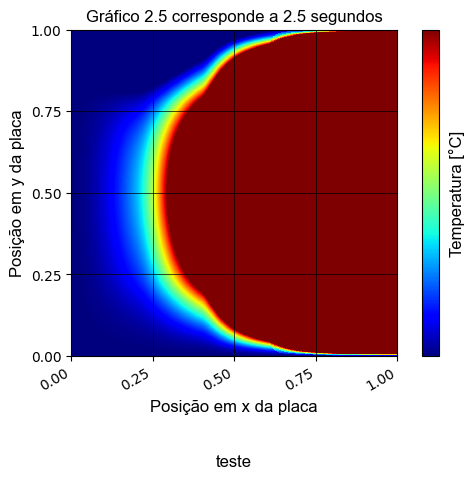

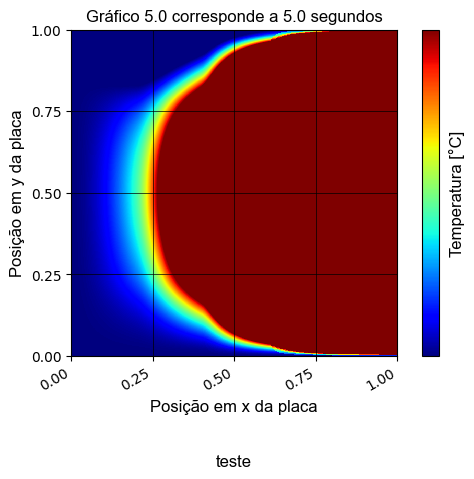

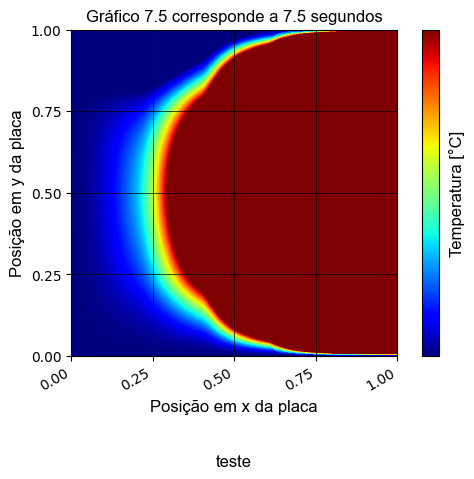

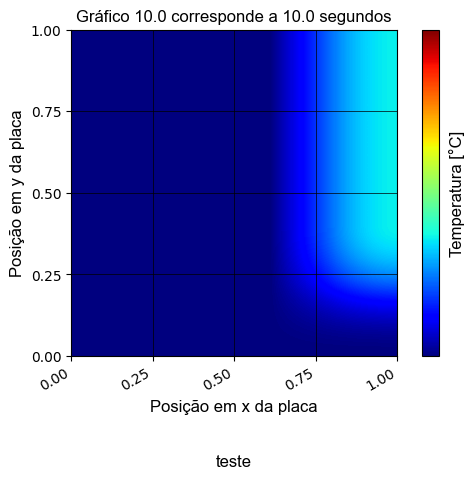

In [29]:
Sol_T_anali = sol_analitica(DomX, DomY, Domt, 1, 1, 10, 10)

#fonte dos gráficos
matplot_font = {'fontname': 'Arial',
                'color':  'black',
                'weight': 'normal',
                'size': 12,
                }

for n in range(1,len(Domt)):
    surf = plt.imshow(Sol_T_anali[n], interpolation='quadric', origin='lower',
             cmap=cm.jet, extent=(DomX.min(), DomX.max(), DomY.min(), DomY.max()))

    ColorBarTicks = np.linspace(Sol_T_anali.min(),Sol_T_anali.max(),5)
    
    cbar = plt.colorbar(surf, shrink=1.0, aspect=20, ticks=ColorBarTicks)
    
    #legenda da barra lateral
    
    cbar.set_label('Temperatura [°C]',fontdict=matplot_font)
    plt.title("Gráfico" + " " + str(Domt[n]) + " " + "corresponde a " + str(Domt[n]) + " segundos",fontdict=matplot_font)
    plt.ylabel("Posição em y da placa",fontdict=matplot_font) 
    plt.xlabel("Posição em x da placa",fontdict=matplot_font) 
    
    
    plt.grid(color='black', linestyle='solid', linewidth=0.5)

    labx = Dom_h(DomX[0],DomX[-1],5)[0]
    laby = Dom_h(DomY[0],DomY[-1],5)[0]
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()
    plt.clim(Sol_T.min(),Sol_T.max())
    
    plt.text(0.5, -0.3, 'teste', ha='center', va='top',fontdict=matplot_font);
    
    plt.show()

In [18]:
#Parâmetros: alpha, Q, Tto, Tox, Toy, xo, xf, yo, yf, to, tf, pontosX, pontosY, pontost    #Onde Q = G/K

DomX, DomY, Domt, Sol_T = dif_implicitaXY(0.0008, 2000*10**3/34, 300, 300, 300, 0, 1, 0, 1, 0, 10, 40, 40, 20)

Plotagem

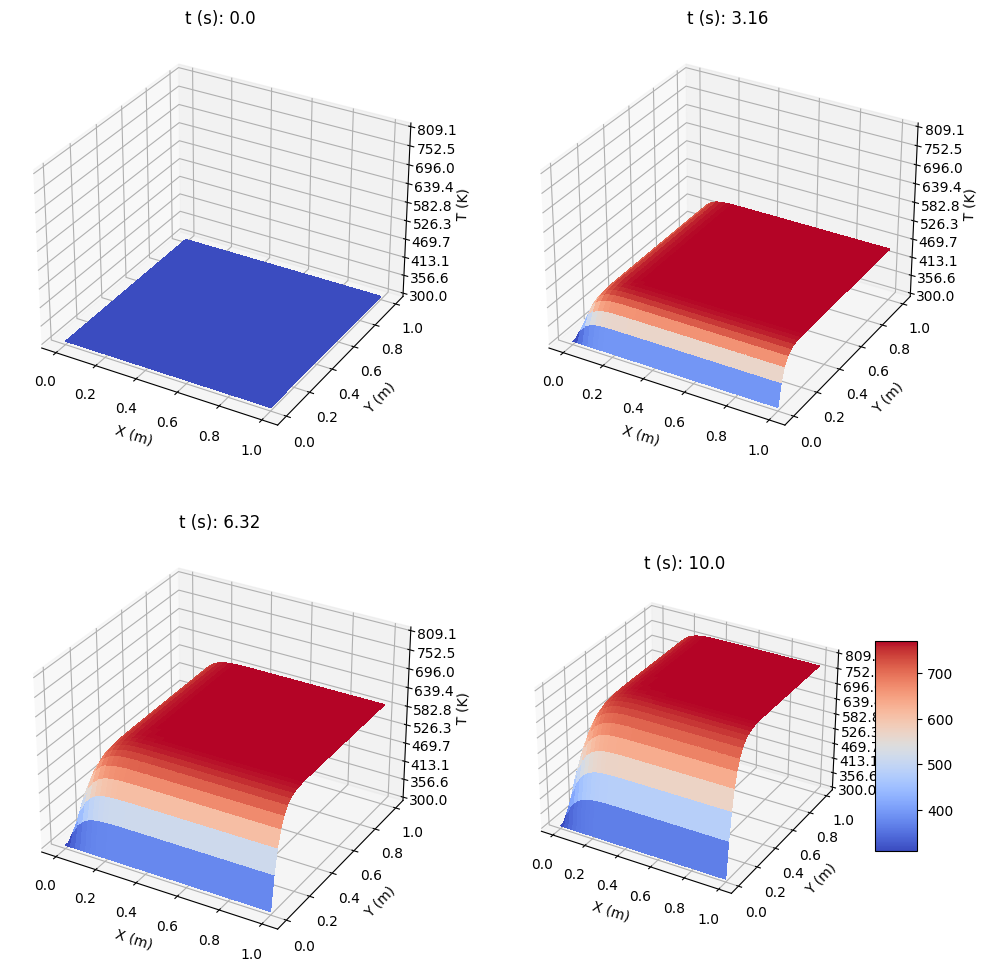

In [19]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

X, Y = np.meshgrid(DomX, DomY)

# Plot the surface.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,12), subplot_kw={"projection": "3d"})

surf1 = ax1.plot_surface(X, Y, Sol_T[:,:,0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf2 = ax2.plot_surface(X, Y, Sol_T[:,:,6], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf3 = ax3.plot_surface(X, Y, Sol_T[:,:,12], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf4 = ax4.plot_surface(X, Y, Sol_T[:,:,-1], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customizing graphics

ax1.set_title('t (s): {}'.format(np.around(Domt[0],2)))
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('T (K)')

ax2.set_title('t (s): {}'.format(np.around(Domt[6],2)))
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('T (K)')

ax3.set_title('t (s): {}'.format(np.around(Domt[12],2)))
ax3.set_xlabel('X (m)')
ax3.set_ylabel('Y (m)')
ax3.set_zlabel('T (K)')

ax4.set_title('t (s): {}'.format(np.around(Domt[-1],2)))
ax4.set_xlabel('X (m)')
ax4.set_ylabel('Y (m)')
ax4.set_zlabel('T (K)')

# Customizing the z axis.
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.set_zlim(300, Sol_T[-1,-1,-1] + 0.05*Sol_T[-1,-1,-1])
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.set_zlim(300, Sol_T[-1,-1,-1] + 0.05*Sol_T[-1,-1,-1])
ax3.zaxis.set_major_locator(LinearLocator(10))
ax3.set_zlim(300, Sol_T[-1,-1,-1] + 0.05*Sol_T[-1,-1,-1])
ax4.zaxis.set_major_locator(LinearLocator(10))
ax4.set_zlim(300, Sol_T[-1,-1,-1] + 0.05*Sol_T[-1,-1,-1])

# Add a color bar which maps values to colors.
fig.colorbar(surf4, shrink=0.5, aspect=5)

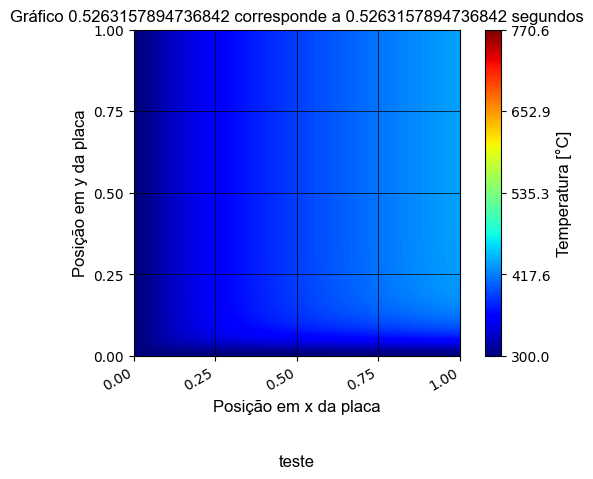

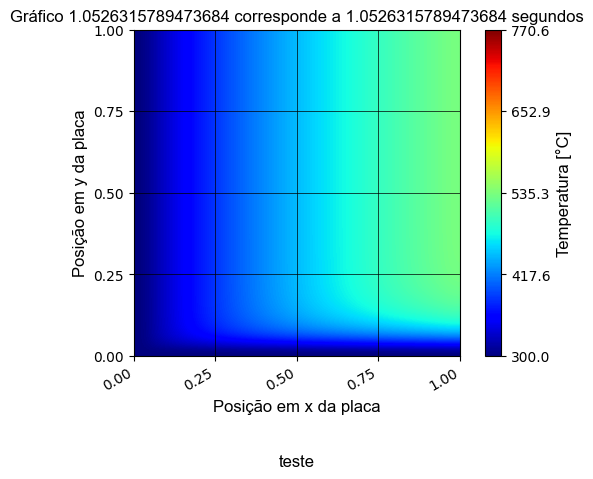

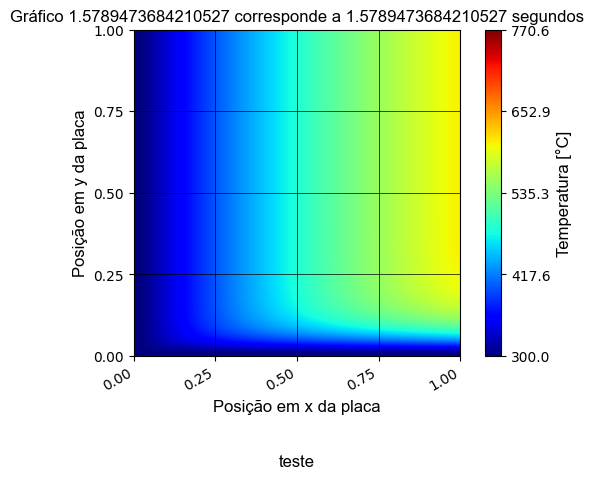

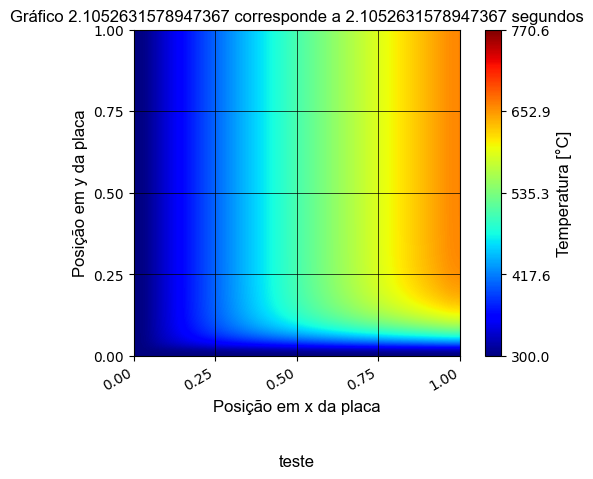

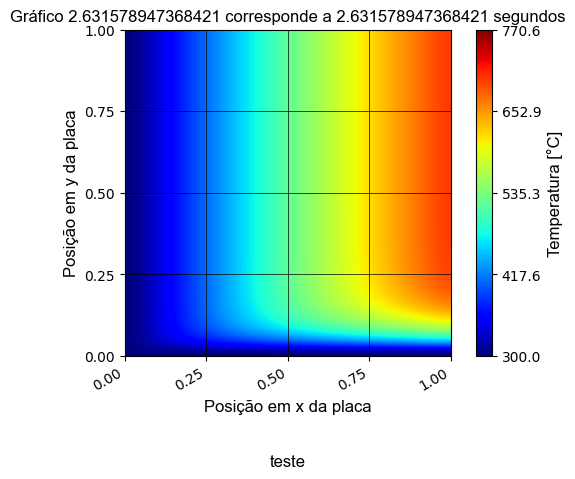

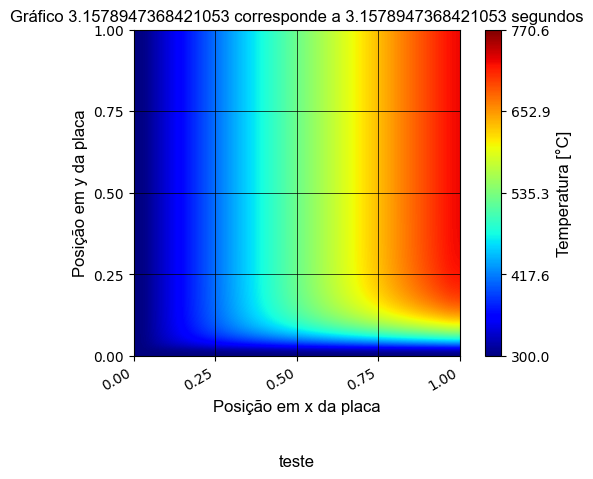

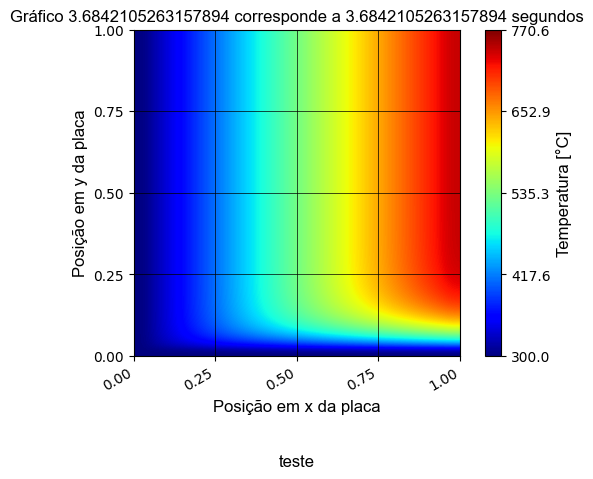

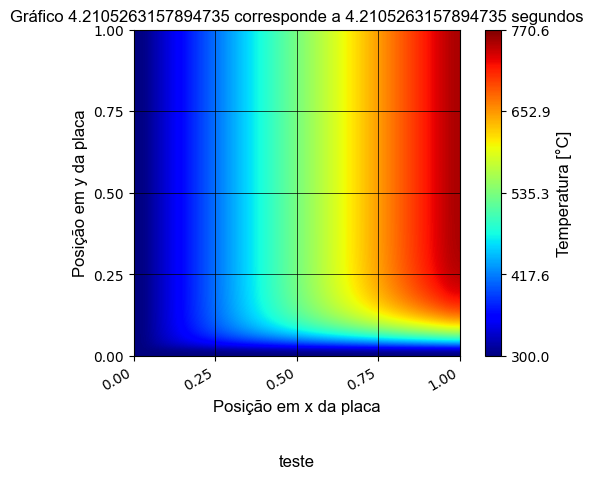

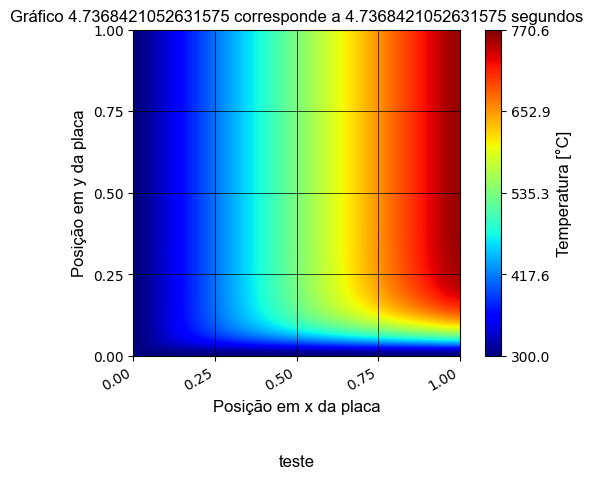

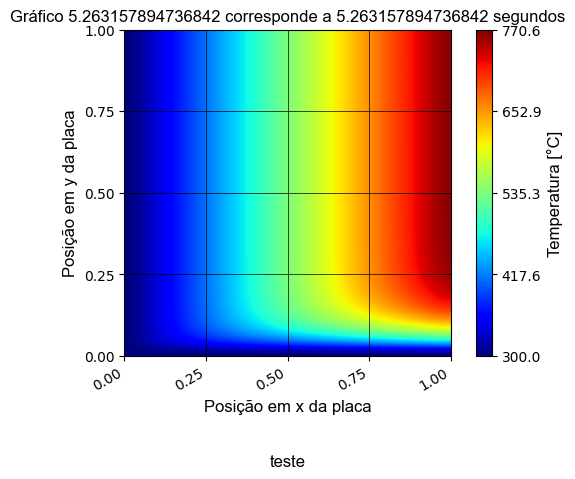

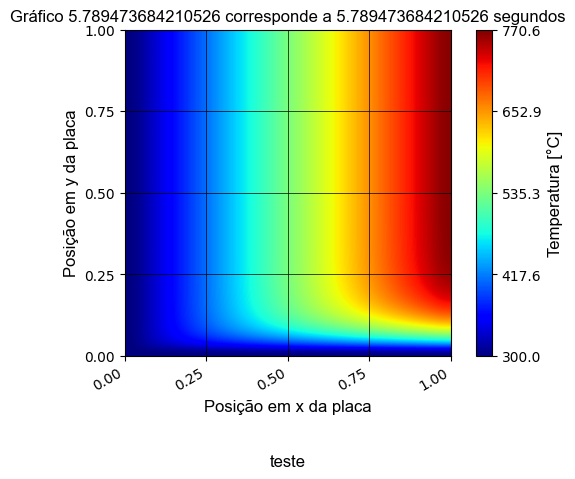

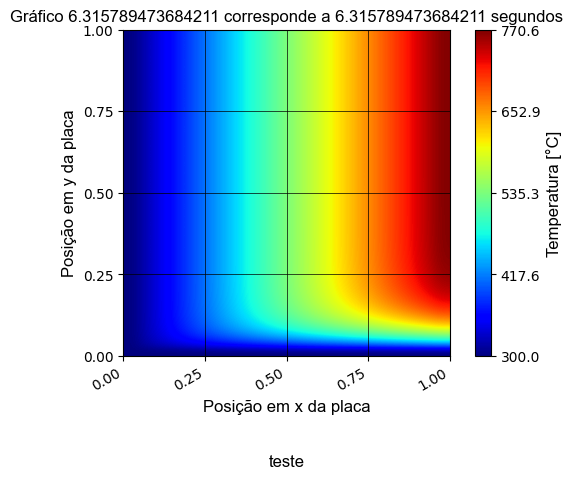

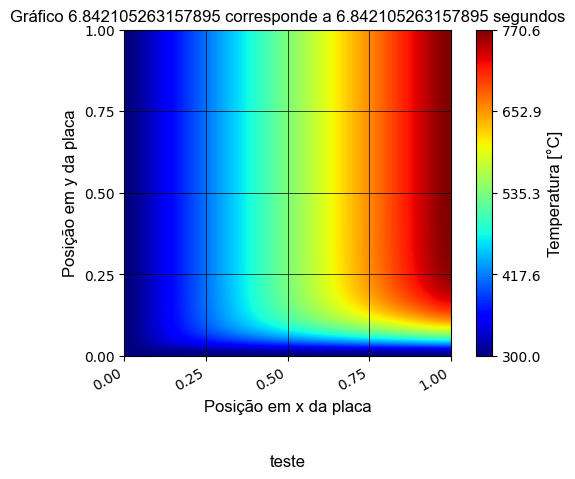

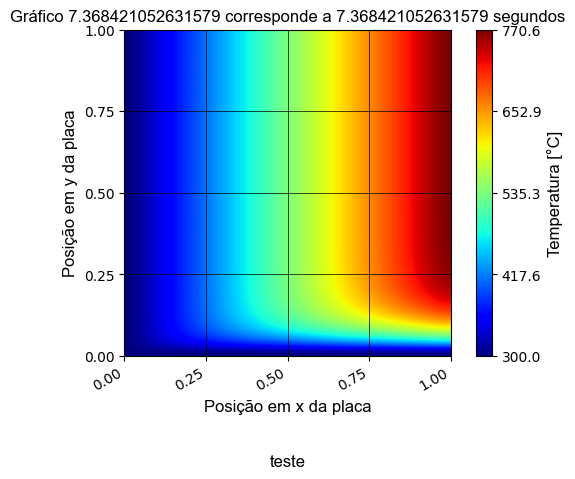

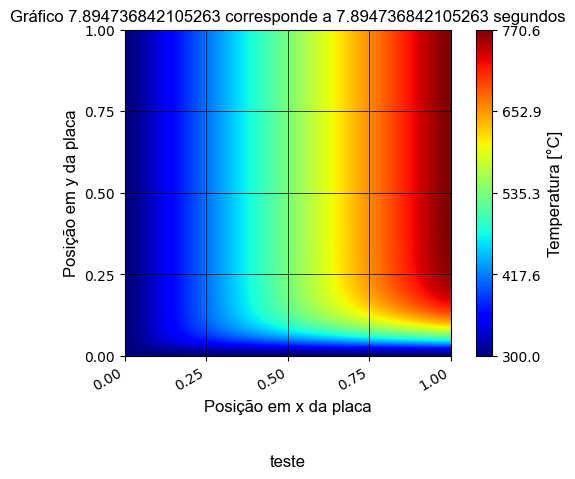

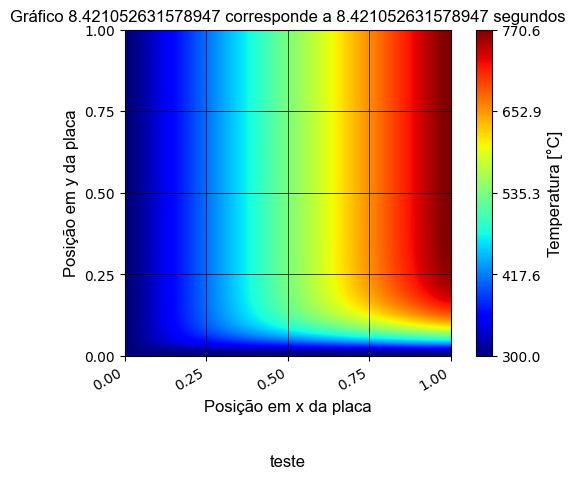

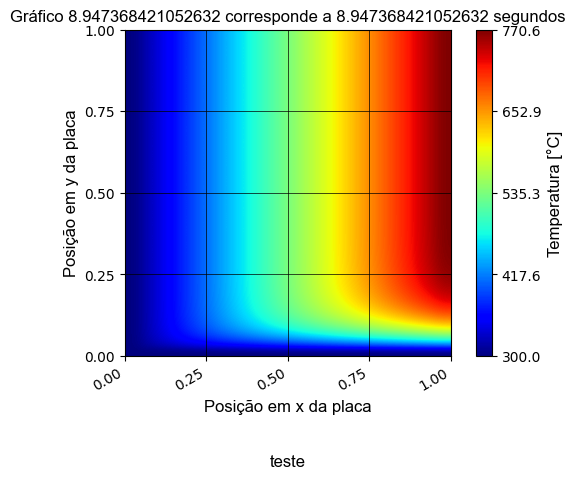

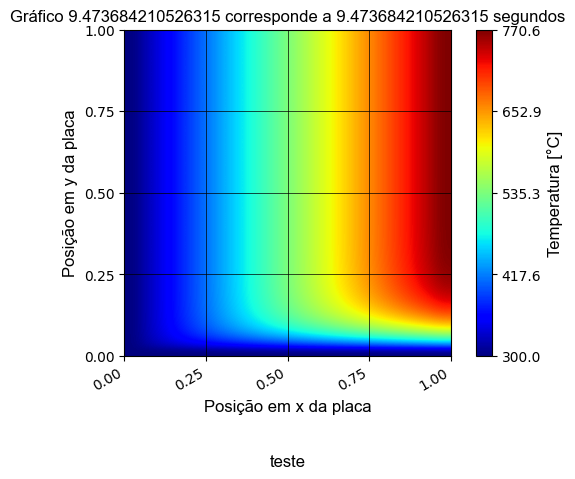

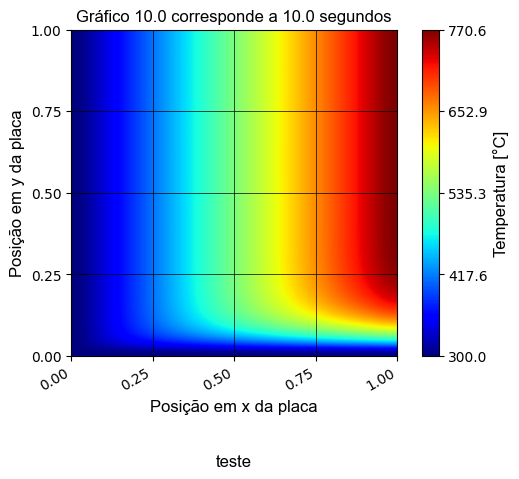

In [23]:
#fonte dos gráficos
matplot_font = {'fontname': 'Arial',
                'color':  'black',
                'weight': 'normal',
                'size': 12,
                }

for n in range(1,len(Domt)):
    surf = plt.imshow(Sol_T[n], interpolation='quadric', origin='lower',
             cmap=cm.jet, extent=(DomX.min(), DomX.max(), DomY.min(), DomY.max()))

    ColorBarTicks = np.linspace(Sol_T.min(),Sol_T.max(),5)
    
    cbar = plt.colorbar(surf, shrink=1.0, aspect=20, ticks=ColorBarTicks)
    
    #legenda da barra lateral
    
    cbar.set_label('Temperatura [°C]',fontdict=matplot_font)
    plt.title("Gráfico" + " " + str(Domt[n]) + " " + "corresponde a " + str(Domt[n]) + " segundos",fontdict=matplot_font)
    plt.ylabel("Posição em y da placa",fontdict=matplot_font) 
    plt.xlabel("Posição em x da placa",fontdict=matplot_font) 
    
    
    plt.grid(color='black', linestyle='solid', linewidth=0.5)

    labx = Dom_h(DomX[0],DomX[-1],5)[0]
    laby = Dom_h(DomY[0],DomY[-1],5)[0]
    plt.xticks(labx)
    plt.yticks(laby)
    plt.gcf().autofmt_xdate()
    plt.clim(Sol_T.min(),Sol_T.max())
    
    plt.text(0.5, -0.3, 'teste', ha='center', va='top',fontdict=matplot_font);
    
    plt.show()

## Malhas e curvaturas

### Confeccionando malhas em $R^2$

Dimensões do tensor da malha: 
(11, 11, 2)


"\nmalha = np.empty((len(nx)*len(ny),2))\ncontador = 0\n\nfor i in range(len(nx)):\n  for j in range(len(ny)):\n    par = np.array([nx[i],ny[j]])    \n    malha[contador] = par\n    contador = contador + 1\n\nprint(malha.shape)\n\nfig, ax = plt.subplots()\n\nax.scatter(malha[:,0],malha[:,1],'red')\nfor i in range(0,nx*ny/nx):\n  ax.plot(malha[i,0], malha[i,1], 'red')\n\nfor i in range(nx*ny/nx,nx*ny/nx):\n  ax.plot(malha[i,0], malha[i,1], 'red')\n"

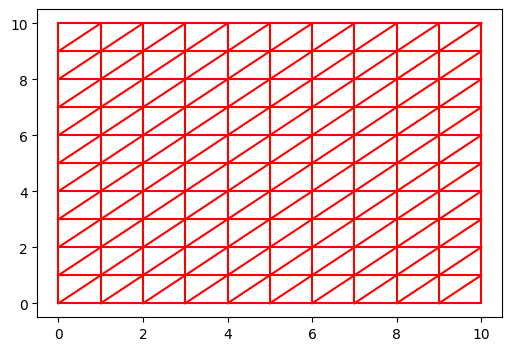

In [ ]:
nx = np.linspace(0,10,11)
ny = np.linspace(0,10,11)
h = abs(nx[1] - nx[0])

malha = np.empty((len(nx),len(ny),2))

for i in range(len(nx)):
  for j in range(len(ny)):
    par = np.array([nx[i],ny[j]])
    malha[i,j] = par

print('Dimensões do tensor da malha: ')
print(malha.shape)

plt.style.use('default')
fig, gr = plt.subplots(figsize = (6,4))

for i in range(len(ny)):
  #linhas verticais
  x = malha[i,:,0]
  y = malha[i,:,1]
  
  gr.plot(x, y, 'red')

  #linhas horizontais
  x = malha[:,i,0]
  y = malha[:,i,1]
  
  gr.plot(x, y, 'red')

  #linhas diagonais inferiores
  x = nx[i:]

  gr.plot(x, x - h*i, 'red')

  #linhas diagonais superiores
  x = nx[:-i]
  gr.plot(x, x + h*i, 'red')


'''
malha = np.empty((len(nx)*len(ny),2))
contador = 0

for i in range(len(nx)):
  for j in range(len(ny)):
    par = np.array([nx[i],ny[j]])    
    malha[contador] = par
    contador = contador + 1

print(malha.shape)

fig, ax = plt.subplots()

ax.scatter(malha[:,0],malha[:,1],'red')
for i in range(0,nx*ny/nx):
  ax.plot(malha[i,0], malha[i,1], 'red')

for i in range(nx*ny/nx,nx*ny/nx):
  ax.plot(malha[i,0], malha[i,1], 'red')
'''

Pertubando a malha

Dimensões do tensor da malha: 
(20, 30, 2)


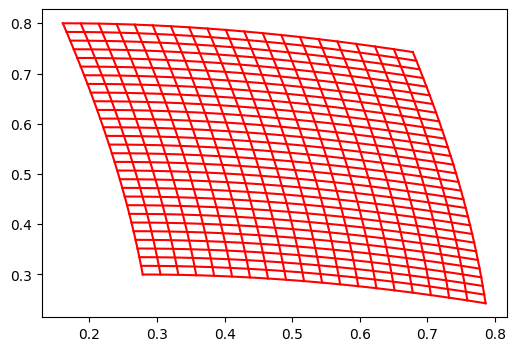

In [ ]:
nx = np.linspace(0,0.5,20)
ny = np.linspace(0,0.5,30)

#Pertubações
def f(x):
  return -0.3*np.sin(2*np.pi*2*x/10 - 2*np.pi/4)

def g(x):
  return np.exp(x)

malha = np.empty((len(nx),len(ny),2))

for i in range(len(nx)):
  for j in range(len(ny)):
    par = np.array([nx[i],ny[j]])
    malha[i,j] = par

print('Dimensões do tensor da malha: ')
print(malha.shape)

#Pertubação somente na última linha:
#malha[:,-1,1] = malha[:,-1,1] + f(malha[:,-1,0])

#Pertubação em todas as linhas:
for i in range(len(ny)):
  malha[:,i,1] = malha[:,i,1] + f(malha[:,i,0])

#Pertubação em todas as colunas:
for i in range(len(nx)):
  malha[i,:,0] = malha[i,:,0] + f(malha[i,:,1])


#Plotando
plt.style.use('default')
fig, gr = plt.subplots(figsize = (6,4))

for i in range(len(nx)):
  #linhas verticais e nós
  x = malha[i,:,0]
  y = malha[i,:,1]
  
  gr.plot(x, y, 'red')

for j in range(len(ny)):
  #linhas horizontais
  x = malha[:,j,0]
  y = malha[:,j,1]
  
  gr.plot(x, y, 'red')
  

### Curvatura em $R^2$

Curvatura é a quantidade na qual um objeto geométrico se desvia do plano, portanto a curvatura de um plano
é zero. O cálculo da curvatura é importante em muitas aplicações de engenharia. Como exemplo importante,
cita-se o cálculo da força de tensão superficial em escoamentos bifásicos que apresentam interface maleável.

Curvatura em um ponto n é dado, discretamente, por:

$k_n = \frac{t_{n+1}-t_{n-1}}{\Delta s}$

$t_{n-1}$ e $t_{n+1}$ são vetores que ligão o ponto $n-1$ ao $n$ e $n$ ao $n+1$ e $\Delta s$ é a distância entre $n+1$ e $n-1$.




Curvatura aproximada: 
0.9999999999999999
Curvatura exata: 
1.0


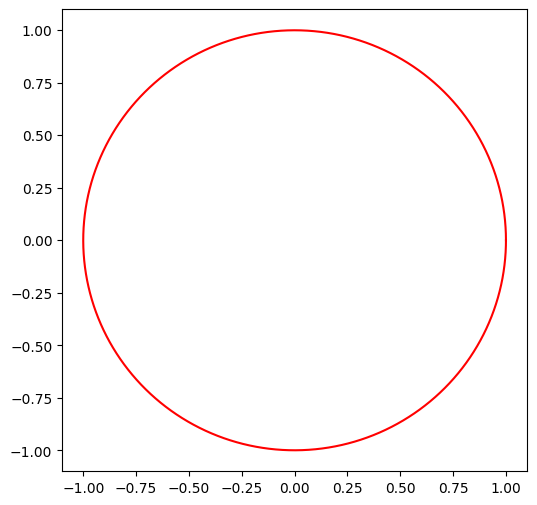

In [ ]:
nt = np.linspace(0,2*np.pi,1000)
r = 1

#Curvatura real
k_real = 1/r

#Construindo curva
curva = np.empty((nt.size,2))

for i in range(nt.size):
  curva[i] = [r*np.cos(nt[i]), r*np.sin(nt[i])]

#Plotando
plt.style.use('default')
fig, gr = plt.subplots(figsize = (6,6))

x = curva[:,0]
y = curva[:,1]

plt.plot(x, y, 'red')

#Curvatura
K = np.empty(nt.size)

#As primeira e última curvaturas devem ser postas manualmente
#No caso de curvas fechadas, ocorre da maneira abaixo:

t2 = (curva[1] - curva[0])/np.linalg.norm(curva[1] - curva[0])
t1 = (curva[0] - curva[-1])/np.linalg.norm(curva[0] - curva[-1])
#T = (t2 - t1)/np.linalg.norm(curva[1] - curva[-1])
T = (t2 - t1)/np.linalg.norm(t2 - t1)
k = np.linalg.norm(T)
K[0] = k

t2 = (curva[0] - curva[-1])/np.linalg.norm(curva[0] - curva[-1])
t1 = (curva[-1] - curva[-2])/np.linalg.norm(curva[-1] - curva[-2])
#T = (t2 - t1)/np.linalg.norm(curva[0] - curva[-2])
T = (t2 - t1)/np.linalg.norm(t2 - t1)
k = np.linalg.norm(T)
K[-1] = k

for i in range(1,nt.size-1):
  t2 = (curva[i+1] - curva[i])/np.linalg.norm(curva[i+1] - curva[i])
  t1 = (curva[i] - curva[i-1])/np.linalg.norm(curva[i] - curva[i-1])

  #T = (t2 - t1)/np.linalg.norm(curva[i+1] - curva[i-1])  ERRADO, assim a curvatura fica dividida por dois
  T = (t2 - t1)/np.linalg.norm(t2 - t1)

  k = np.linalg.norm(T)

  K[i] = k

print('Curvatura aproximada: ')
print(K[2])
print('Curvatura exata: ')
print(k_real)

### Confeccionando malhas em $R^3$

**Superfície:**

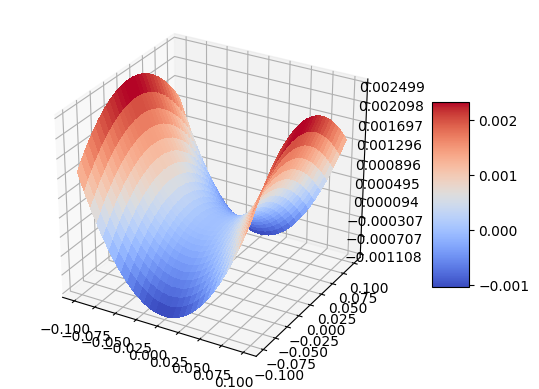

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

nx = np.linspace(-0.10,0.10,30)
ny = np.linspace(-0.10,0.10,30)

#Pertubações
def f(x):
  return -0.3*np.sin(2*np.pi*2*x/10 - 2*np.pi/4)

def g(x):
  return np.exp(x)

X, Y = np.meshgrid(nx, ny)

#Paraboloide
#Z = (X/2)**2 + (Y/3)**2
#Paraboloide hiperbólico
Z = (X/2)**2 - (Y/3)**2
#Esfera
#Z = np.sqrt(1 - X**2 - Y**2)

# Plot the surface.

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

**Volume:**

Dimensões do tensor da malha: 
(10, 15, 15, 3)


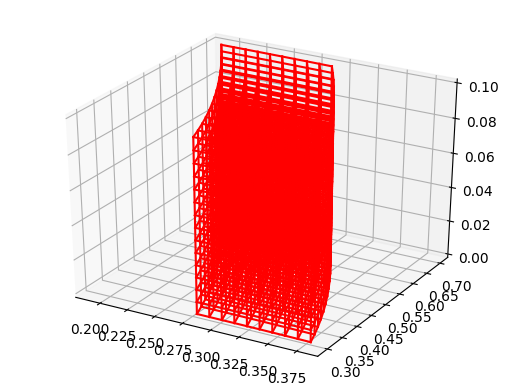

In [ ]:
from numpy.lib.nanfunctions import nanmax
nx = np.linspace(0,0.1,10)
ny = np.linspace(0,0.4,15)
nz = np.linspace(0,0.10,15)

#Pertubações
def f(x):
  return -0.3*np.sin(2*np.pi*2*x/10 - 2*np.pi/4)

def g(x):
  return np.exp(x)

malha = np.empty((len(nx),len(ny),len(nz),3))

for i in range(len(nx)):
  for j in range(len(ny)):
    for k in range(len(nz)):
      par = np.array([nx[i],ny[j],nz[k]])
      malha[i,j,k] = par

print('Dimensões do tensor da malha: ')
print(malha.shape)

#Pertubação em todas as linhas:

for j in range(len(ny)):
  malha[:,j,:,1] = malha[:,j,:,1] + f(malha[:,j,:,0])

#Pertubação em todas as colunas:
for i in range(len(nx)):
  malha[i,:,:,0] = malha[i,:,:,0] + f(malha[i,:,:,1])


#Plotando
plt.style.use('default')

fig, ax1 = plt.subplots()
ax1 = plt.axes(projection="3d")


for i in range(len(nx)):
  for j in range(len(ny)):
    
    x = malha[i,j,:,0]
    y = malha[i,j,:,1]
    z = malha[i,j,:,2]

    ax1.plot(x, y, z, 'red')

for i in range(len(nx)):
  for k in range(len(nz)):

    x = malha[i,:,k,0]
    y = malha[i,:,k,1]
    z = malha[i,:,k,2]

    ax1.plot(x, y, z, 'red')

for j in range(len(ny)):
  for k in range(len(nz)):

    x = malha[:,j,k,0]
    y = malha[:,j,k,1]
    z = malha[:,j,k,2]

    ax1.plot3D(x, y, z, 'red')

### Curvatura em $R^3$